# Intuition

In [1]:
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

import sys
sys.path.append("../..")
from root_to_np import getdR, passJet
from usefulFcts import VR, ftag_cone

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
fname = '../../../public/user.bdong.mc16_13TeV.427080.flatpT_Zprime.mc16d_newDerivation_noRetag_rerun_Akt4EMPf/user.bdong.16288899.Akt4EMPf._000001.root'
myTree = uproot.open(fname)["bTag_AntiKt4EMPFlowJets"]

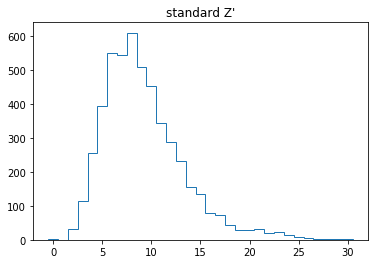

In [4]:
plt.hist(myTree.array(b'njets'),31,(-0.5,30.5),histtype='step')
plt.title('standard Z\'')
plt.show()

Let's check the $p_T$ min in the PFLow jet collection before we apply any cuts!

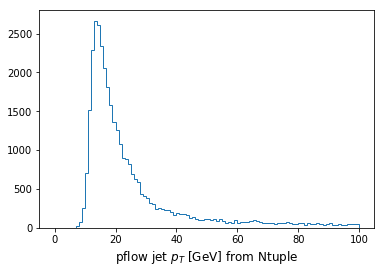

In [7]:
flat_jet_pt = np.concatenate(myTree.array(b'jet_pt'),axis=0) * 0.001 # GeV

plt.hist(flat_jet_pt, bins=100, range=[0,100],
         histtype='step')#,log=True)
plt.xlabel('pflow jet $p_T$ [GeV] from Ntuple',fontsize=12)
plt.show()

In [8]:
for pts in myTree.array(b'jet_pt'):
    print(min(pts))

11673.672
11588.175
12370.983
26271.58
10662.859
11786.113
10900.549
11336.254
11088.318
14411.453
13113.152
12370.195
11173.468
11654.076
11589.37
16937.812
13571.434
19330.95
15760.385
14182.581
11641.278
11331.674
18982.28
12843.299
12855.413
13085.587
13405.772
21513.045
8107.2217
12460.168
11563.336
14336.497
16991.646
12274.122
11698.679
12393.301
16841.287
12491.59
15380.557
13471.594
11888.227
12096.877
11323.329
16148.935
12236.625
11267.006
11888.509
11158.097
12928.122
12347.295
13701.348
15080.501
17943.826
13098.622
10784.181
11222.669
11534.043
13677.219
10771.32
12258.015
10568.855
14806.835
15863.737
12141.941
10873.662
14658.667
12840.601
10745.467
11458.655
13627.818
12481.605
11950.243
15766.082
12781.9795
13056.33
22405.826
15186.73
9954.453
11750.869
11507.803
14478.061
19100.973
12988.192
11660.791
12487.495
11210.369
13409.738
12156.315
12974.124
11158.115
16025.607
8179.9395
14585.167
12020.917
15691.72
16560.309
12225.188
12621.696
13244.347
13654.694
16845.566

11902.625
13697.037
11583.451
14950.205
11757.854
14145.508
12088.197
13637.258
14476.682
13197.364
11094.633
12594.329
12642.335
11460.043
13094.989
13618.914
9590.657
27785.713
11637.454
18244.03
12116.148
12292.882
12154.714
12952.47
10763.427
25866.486
11912.22
11624.581
15941.369
16296.2705
12989.609
11729.842
15872.6455
11191.532
12365.198
13028.796
8753.316
60589.906
11979.573
13495.072
13180.636
11727.016
11232.859
11228.775
11153.65
253474.72
10346.808
40805.902
11684.506
14572.717
15666.389
15129.462
18665.014
11585.9
14104.559
11729.093
11171.356
12822.109
11183.698
10228.082
11846.042
11628.285
9480.116
10763.635
12934.294
10872.453
10596.511
12895.7295
12453.503
10851.794
14519.584
12903.4795
11424.407
15404.803
14507.971
11255.27
12476.775
11468.872
11632.544
12378.744
12515.235
16037.88
11311.112
12073.857
12623.501
12515.35
14242.281
32689.688
14797.051
12267.267
13953.481
12541.87
16453.818
13564.861
10494.203
718484.1
11049.407
13866.715
7952.442
10024.666
12724.4795


13328.416
11399.84
11420.863
12146.701
12819.962
12868.661
11505.2295
63879.633
13640.191
16389.03
12142.403
18013.348
13655.406
12660.737
12659.984
15750.799
12704.9795
11636.748
11937.021
18299.578
8585.829
11840.901
10688.456
11679.466
12027.133
13379.89
13175.86
11388.607
9255.394
11557.461
18306.316
15172.071
11276.088
12167.421
12096.681
17699.066
12307.132
12599.413
12391.218
12162.956
11136.692
13492.441
13588.676
11216.082
11601.851
12479.816
17398.836
13482.577
12746.771
11567.161
15377.965
16892.309
11265.926
14555.709
12557.38
9394.842
11593.441
12314.736
13135.367
10638.76
31155.855
12251.709
11876.918
11018.104
13434.733
12462.982
15453.023
12583.872
13197.059
15433.4
14406.276
16669.756
11502.925
10474.764
18268.844
11814.53
11907.924
13897.356
12100.27
15142.966
13479.7295
14539.432
61813.06
12399.531
11682.672
11077.971
14550.892
11109.664
9852.464
13617.913
14474.74
36720.36
13243.655
14501.764
12480.022
10426.438
13357.22
14742.601
12591.819
10958.115
16806.0
12995.7

11429.977
12016.886
17105.97
11458.762
13128.516
10887.113
14264.199
13351.13
12111.732
16228.376
9775.121
11211.2
11691.582
12852.468
12371.701
10213.381
11977.09
15733.746
12055.126
10954.927
12439.213
10173.978
15568.186
14847.805
14086.605
13652.814
11308.937
14977.445
14347.986
16618.416
13386.386
11057.852
8396.447
14195.888
13279.418
11550.746
11360.716
12498.832
11633.056
13545.307
17988.215
11928.575
11327.666
14345.471
12485.657
11517.017
9535.901
12679.958
11095.627
11410.576
18365.629
12067.191
11848.061
12722.967
11188.316
12283.072
13708.904
11507.386
15785.352
10713.249
16008.127
13450.04
16657.37
10199.382
11559.273
12587.906
10918.505
10252.95
9079.326
12217.79
14577.871
11894.295
11317.795
10266.689
13140.534
12871.057
14831.997
13738.909
14871.837
10883.455
10369.234
12882.634
10768.907
12368.714
14622.32
14173.163
13220.112
14461.845
14597.543
14110.102
12239.225
12798.595
12307.1875
11984.099
13502.143
12258.949
11676.507
12300.495
9449.21
15024.487
11812.812
11566

ValueError: min() arg is an empty sequence

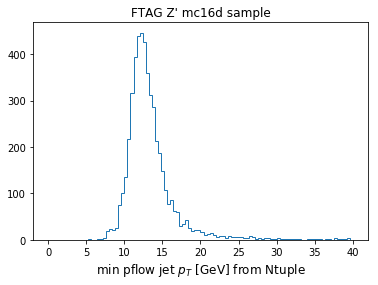

In [12]:
min_jet_pt = [min(pts) * 0.001 for pts in myTree.array(b'jet_pt') if len(pts) > 0] # GeV

plt.hist(min_jet_pt, bins=100, range=[0,40],
         histtype='step')#,log=True)
plt.xlabel('min pflow jet $p_T$ [GeV] from Ntuple',fontsize=12)
plt.title('FTAG Z\' mc16d sample')
plt.show()

In [11]:
min(min_jet_pt)

5.395720703125

In [18]:
fname = '../../../public/user.bdong.410470.ttbar_hdamp258p75_nonallhad.mc16d_newDerivation_noRetag_Akt4EMPf/user.bdong.16276417.Akt4EMPf._000001.root'
ttbarTree = uproot.open(fname)["bTag_AntiKt4EMPFlowJets"]

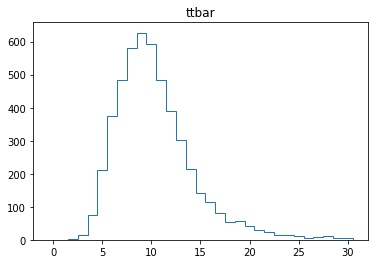

In [20]:
plt.hist(ttbarTree.array(b'njets'),31,(-0.5,30.5),histtype='step')
plt.title('ttbar')
plt.show()

In [14]:
fname = '../../../public/FrancescoNtuples/mc16d_PFlow_hybrid_1.5TeV/Rnn_Pflow51208.root'
hybridTree = uproot.open(fname)["bTag_AntiKt4EMPFlowJets"]

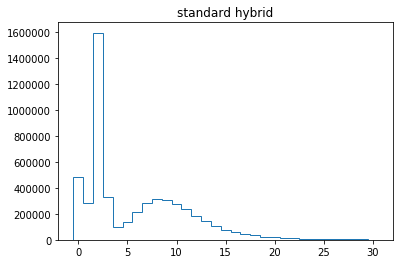

In [17]:
plt.hist(hybridTree.array(b'njets'),31,(-0.5,30.5),histtype='step')
plt.title('standard hybrid')
plt.show()

In [21]:
for pts in hybridTree.array(b'jet_pt'):
    print(np.sum((pts > 5e3)),pts)

2 [564773.5  489887.03]
2 [1266775.8 1194275.2]
1 [380551.47]
2 [328047.84 318511.72]
2 [1453405.    271828.66]
0 []
2 [651157.25 584426.7 ]
0 []
3 [1119466.6  1012691.94  253538.83]
2 [858108.2 817405.9]
2 [728756.7 692324.8]
2 [554167.8  382584.47]
2 [859913.25 616430.5 ]
0 []
1 [742810.25]
0 []
2 [894100.5 686607.2]
0 []
3 [613409.5  618612.25 313792.78]
1 [650190.25]
0 []
2 [1254027.8 1162176.9]
0 []
2 [757703.4 777920.9]
2 [728583.   409026.22]
2 [488699.1  443758.06]
2 [677123.   627682.06]
3 [875640.8 738740.5 311660.2]
2 [912521.94 878451.3 ]
2 [498446.34 447545.5 ]
3 [584894.56 421349.4  309732.66]
2 [1291488.   796261.6]
2 [401280.62 385293.44]
2 [470749.47 345218.47]
2 [892638.44 698209.2 ]
2 [555460.9  252414.98]
3 [1182216.4  1025373.1   473380.56]
2 [839488.7  278321.66]
2 [700621.94 499448.3 ]
2 [491162.6 437207.5]
2 [1023214.5  960012.2]
2 [1273208.2 1192069.2]
0 []
2 [1135240.6 1119752.1]
0 []
2 [807612.5 687149.2]
2 [649634.7  590466.94]
2 [613599.56 571258.4 ]
0 []
3

2 [772937.7 744218.5]
2 [695815.   679718.06]
3 [445805.38 298754.5  273957.72]
2 [367901.72 349109.28]
2 [402351.75 232504.86]
2 [997797.4  950887.06]
2 [1035397.7  995208.2]
2 [604789.5 396677. ]
1 [262395.44]
0 []
3 [619949.6 537034.5 459477.9]
2 [498246.22 302777.53]
0 []
2 [913530.5  512204.72]
3 [1178163.6 1107042.9  373966.4]
2 [646156.94 470295.88]
2 [1043453.44  907654.2 ]
2 [416552.88 426938.84]
3 [1130937.1   703878.7   511117.53]
3 [1087709.4  902017.5  348199.7]
3 [1067095.9   823687.06  417350.66]
2 [660827.44 583404.94]
0 []
4 [895185.7  673932.3  295709.28 159987.64]
2 [962374.94 926208.  ]
1 [477199.47]
2 [676327.8 615332.1]
2 [636457.4 582131.7]
2 [780436.2  698553.06]
2 [329563.97 303988.53]
2 [504433.16 341530.  ]
2 [479376.03 455009.62]
2 [867378.6  817311.44]
2 [433611.62 303212.84]
2 [771633.25 661935.6 ]
2 [388295.72 252128.03]
2 [833047.06 866545.8 ]
2 [1001256.8   872373.06]
2 [537564.06 547694.25]
0 []
2 [979736.94 773557.94]
2 [250783.95 255697.4 ]
2 [402374

2 [1154458.6 1121465.1]
1 [269802.25]
3 [1224213.1  986660.4  293807. ]
2 [666310.25 620605.9 ]
0 []
2 [927575.5 917573.6]
1 [531941.8]
0 []
3 [1212647.2   894287.4   364240.72]
1 [627111.06]
0 []
2 [832903.4 839279.5]
2 [565851.8  444704.44]
2 [833948.7 755447.8]
2 [359543.  343924.2]
2 [1079894.8 1006482.9]
2 [846522.1  758358.75]
2 [ 972996.94 1011927.44]
0 []
2 [1026684.75  936709.7 ]
2 [1072625.2  896762. ]
0 []
2 [1018312.9  992472.4]
0 []
2 [907523.2  642583.25]
2 [437813.1 359449.2]
2 [466638.25 377925.9 ]
2 [431323.06 395911.53]
2 [911644.2 679914.2]
2 [762238.94 702254.4 ]
2 [921233.9 583798.3]
2 [605384.94 630680.2 ]
2 [481259.72 495998.6 ]
0 []
1 [267272.03]
1 [390999.06]
0 []
1 [869841.7]
0 []
2 [1029095.1  917606.1]
2 [577436.3  367827.12]
2 [976432.9 939121.2]
2 [1437964.2 1357276.8]
2 [950447.6 873375.3]
2 [679044.06 593950.2 ]
0 []
0 []
2 [900574.8 859780.2]
1 [506294.66]
2 [578300.06 476669.88]
3 [561166.   520352.97 271235.44]
2 [601319.94 265084.9 ]
0 []
3 [824000.5

2 [412765.25 416415.88]
2 [866510. 808617.]
1 [490348.3]
2 [535601.6 543663.5]
1 [146034.64]
2 [983159.5 896774.6]
2 [437472.03 233934.66]
2 [663311.94 530014.9 ]
0 []
0 []
0 []
1 [497063.03]
0 []
3 [878753.25 360024.66 262516.06]
1 [340736.44]
1 [312895.62]
0 []
1 [602865.]
0 []
1 [310794.9]
0 []
3 [865060.3  540586.75 299293.38]
2 [510441.03 301011.22]
2 [413615.5  372481.56]
0 []
3 [966177.   638490.56 491361.53]
2 [926526.2  785908.44]
0 []
1 [285384.28]
0 []
2 [799483.  709901.3]
2 [773902.75 742397.94]
2 [593562.7 643043.2]
1 [599699.4]
2 [1321861.9 1214190.4]
2 [750034.44 601790.94]
1 [442803.38]
0 []
1 [347843.03]
2 [1321307.2 1271464.9]
2 [549623.06 448449.75]
2 [610116.5  526276.94]
2 [260308.8  258046.86]
2 [808901.2  739454.56]
2 [1337489.8 1102708.9]
0 []
3 [929154.44 502359.53 349114.1 ]
2 [991211.9  864892.25]
2 [861437.44 797108.06]
2 [1041499.75 1034944.75]
1 [423818.62]
0 []
2 [990129.1  740328.56]
0 []
2 [500903.06 443987.7 ]
2 [755187.75 736124.9 ]
2 [865675.06 7452

2 [802119.6 768517. ]
2 [511419.53 447958.3 ]
0 []
0 []
0 []
3 [1210670.9   930741.75  347920.47]
0 []
2 [839399.06 446677.5 ]
2 [736192.   526785.75]
2 [1299472.  1190367.4]
2 [345272.3  298251.72]
1 [529298.1]
2 [844248.4 723647.2]
2 [748019.8 409487.5]
2 [543067.75 311400.34]
2 [699300.2  582668.94]
2 [477370.9  502976.94]
3 [1243254.8   589337.6   374637.25]
2 [751837.2 686214.4]
2 [923947.44 871345.  ]
2 [662959.9  621918.75]
2 [804799.06 482447.53]
1 [1136404.]
4 [1143884.1   880669.5   477558.1   255924.06]
2 [485138.34 461842.94]
3 [863451.94 522284.03 442245.38]
2 [1104380.5  980423.4]
2 [465616.22 470783.75]
2 [365729.84 350273.28]
0 []
2 [452248.8  452979.72]
1 [432178.2]
2 [808769.75 689247.  ]
2 [590336.7  549814.75]
2 [752842.4  771664.75]
0 []
2 [1104577.6  719444.4]
0 []
2 [484125.8  321628.12]
3 [920899.9  554175.75 321200.8 ]
0 []
2 [961912.1  927063.06]
1 [278769.97]
2 [815086.1  801102.44]
2 [671496.25 584492.75]
0 []
2 [1205238.1 1209498.4]
1 [289319.62]
4 [706768.

2 [514589.62 410965.56]
2 [494974.6 400841.7]
2 [312198.2  314065.34]
2 [415926.97 401339.34]
2 [829735.5  785882.06]
2 [1162979.5 1128475.2]
1 [340650.]
4 [709322.9  563079.6  257550.11 260249.62]
1 [1031864.7]
2 [584142.2 480061.7]
2 [813167.1  719933.25]
2 [512448.62 267209.  ]
2 [1018160.56  765101.75]
0 []
0 []
2 [526977.44 394455.72]
2 [731720.1  640607.06]
2 [581050.2 532130.5]
2 [1132010.  1084610.9]
2 [671555.5 556037.1]
4 [1623748.   1289331.6   462902.1   339435.97]
2 [561491.44 296327.8 ]
2 [562148.3  487399.53]
3 [492733.97 443899.75 350071.72]
0 []
3 [1053315.6   817357.3   423384.03]
0 []
0 []
2 [542286.6 550856.3]
2 [770597.06 473410.78]
2 [600488.06 512025.38]
2 [838938.06 713753.5 ]
2 [595354.1  497345.28]
1 [489896.12]
2 [409341.3  385509.06]
2 [823109.9 627851.2]
2 [439580.75 425298.38]
2 [866117.6 733376.4]
2 [570438.5 524165. ]
2 [481206.6  460435.78]
0 []
2 [421410.2 350047.7]
2 [735437.06 439056.44]
2 [810249.94 527943.94]
2 [378082.4 321046.5]
2 [514459.47 2903

2 [1282228.6 1302005.9]
0 []
2 [590499.56 452933.97]
2 [555520.7  380108.97]
0 []
3 [991367.5  840660.   349113.25]
0 []
2 [338699.25 378938.62]
2 [489228.2 418278.7]
2 [1217995.5 1261794.9]
0 []
2 [900226.2  571591.75]
1 [304355.97]
0 []
3 [1176042.1   729902.25  411199.34]
2 [671761.   628777.94]
2 [993632.2  951417.75]
0 []
3 [446483.3  293405.12 268259.03]
2 [589843.75 442178.75]
0 []
2 [597076.4 627771.9]
2 [449515.53 403523.3 ]
3 [1144556.2   986634.25  322872.  ]
2 [ 979755.1 1010896.3]
2 [894699.2 890873. ]
2 [606245.  437617.7]
0 []
1 [292626.38]
2 [538505.25 323113.88]
2 [764929.1  605256.25]
2 [696898.5  566078.94]
2 [1141564.4 1149111.2]
0 []
0 []
2 [851667.56 767195.56]
3 [431894.12 398498.7  340848.53]
2 [472543.3 427117.5]
1 [936366.6]
2 [1088322.2 1125723.1]
1 [300678.56]
3 [886497.4  572433.75 452665.94]
0 []
1 [751851.8]
2 [1406025.2 1286766.1]
2 [543002.4 310696.8]
0 []
2 [961255.8 953635. ]
2 [1339046.6 1303381.9]
0 []
2 [677138.9 714922.6]
2 [555630.4 541250.7]
2 [

2 [1395791.5 1275990.4]
0 []
2 [988395.6  932177.94]
2 [573612.94 474494.12]
4 [641667.7  564481.1  549453.25 421961.12]
0 []
3 [1105017.4   883017.2   306471.47]
2 [362789.6  312525.75]
0 []
0 []
2 [1201313.  1171232.9]
3 [1287766.9 1006913.8  338825.4]
0 []
3 [736235.3  810916.25 291038.  ]
2 [832500.9  594205.44]
2 [785339.4 616038.2]
2 [619788.5 501658.8]
2 [1389514.8 1283876. ]
2 [374509.03 300326.97]
0 []
2 [1227070.8   900685.56]
2 [458604.84 295985.66]
0 []
2 [438065.38 283420.4 ]
0 []
2 [403397.9  339186.06]
2 [494219.66 405717.5 ]
0 []
3 [582656.94 481045.66 320933.03]
2 [533971.4 509530.3]
1 [322149.8]
4 [771354.4  559574.44 493958.22 356617.7 ]
0 []
1 [243075.17]
2 [1229274.2 1320028.2]
2 [1161160.1 1120721.8]
2 [457592.72 298988.88]
2 [1273404.9 1050395. ]
2 [557516.6  375076.97]
2 [1012293.56  793243.75]
0 []
1 [269336.16]
2 [336365.97 343865.6 ]
0 []
2 [437992.4 308069.4]
2 [390109.44 361849.  ]
2 [255843.19 267404.16]
2 [935137.2  854979.44]
4 [1248402.5   770765.75  32

 17159.941 15962.632 20848.799 16057.078 16293.836 17525.639 12060.664]
7 [57677.527 53753.965 44576.14  40427.047 33528.902 31904.525 15416.678]
14 [84672.89  73986.35  71418.65  33006.43  31686.006 32367.145 29286.908
 29454.04  19021.537 14958.143 12184.091 16761.271 12328.075 11147.728]
18 [97538.55  69911.805 42355.93  34889.22  30652.426 26922.031 21603.635
 21071.67  20914.977 20266.086 20505.945 14088.349 14793.891 11471.924
 13903.05  11563.022 13835.842 11195.353]
11 [63288.445 50074.71  53810.496 33636.766 28807.209 22973.607 21024.438
 17345.979 15607.451 14758.92  10981.061]
11 [82052.46   53745.543  35812.254  30456.229  30386.57   30982.
 18512.943  17900.531  14676.5205 13864.962  12218.064 ]
11 [110130.02  104599.8    66646.94   60536.055  35971.023  29522.074
  26015.492  26385.098  20172.332  19474.266  24212.797]
7 [78134.17  37694.28  21080.852 18345.23  12479.397 12264.174 11084.803]
10 [93257.89  72979.39  44287.33  26187.723 26104.45  20550.736 12518.306
 16875.

 27879.63  27689.066 19081.865 16191.1   17112.621 13505.719 10013.5  ]
5 [125728.81   72673.25   52264.4    43075.13   13356.001]
8 [65815.06  60307.49  42722.555 35433.43  36492.953 36324.2   17136.527
 17598.93 ]
11 [135003.05   86651.11   78741.87   53982.273  37550.9    33894.883
  33652.117  19754.838  25374.363  13156.1    12270.699]
6 [57269.67  53225.25  37578.188 32584.66  27724.045 14375.478]
8 [59507.05  44923.164 32762.387 28625.2   20795.781 23130.906 14343.381
 12812.078]
5 [41819.285 34806.01  24019.855 13505.921 14075.867]
10 [164750.89    72003.04    66669.65    44649.863   35175.59    30910.197
  27097.06    12669.509   11201.6875  11599.79  ]
9 [115347.09   98590.86   36818.633  33616.82   30599.953  22406.36
  23842.398  16789.623  19555.066]
5 [125015.05   87248.58   54484.188  14948.464  15725.787]
6 [103695.87   79891.01   47895.426  30947.943  27160.088  21075.238]
14 [104758.1    52317.69   38123.89   33280.125  22709.236  14910.041
  21372.57   16224.499  171

  12649.292]
19 [173600.52  121994.3    44257.25   45447.03   37945.44   30124.434
  21551.71   17505.68   16568.95   18992.672  15247.667  17029.16
  20955.662  12768.077  11226.252  12709.984  13313.47    9450.627
   9183.244]
7 [113442.69   35278.363  24291.293  18773.691  18321.459  12992.165
  12825.989]
16 [194764.08  140430.9   104005.516  65265.42   61244.668  49676.957
  45077.32   41387.703  39209.758  25682.299  20247.744  17534.207
  10356.327  14969.492  14560.67   13192.485]
11 [65956.82  52685.535 42609.945 29799.006 24698.88  21902.307 16970.
 13841.022 13333.595 21178.91  12764.198]
12 [41120.61  36948.977 33254.863 37903.043 23913.545 14421.87  13402.721
 16148.123 12986.3   11911.169 10342.289  9073.893]
13 [169883.1   131528.73   58669.53   54570.652  21908.8    19228.732
  19299.287  23408.695  21103.422  13273.551  14069.134  12446.659
   9159.174]
13 [248097.06   95416.21   65666.234  32962.246  29098.988  24231.803
  20587.447  15667.5    25605.422  15630.298  1

  16398.18   15703.613  13668.537  12958.432]
6 [138104.88  111892.44   75700.96   22995.562  17556.025  21173.092]
6 [128110.53   92474.57   30350.402  22569.434  19462.1    18336.682]
20 [98037.734 57353.82  52515.94  54564.242 26469.426 26876.834 23744.432
 21856.512 20403.104 23517.258 21348.637 19230.555 17161.807 20158.498
 18996.75  16008.638 14580.633 15673.835 16861.984 12826.546]
7 [71600.836 67210.836 54852.53  38285.133 40158.07  12852.512 13650.769]
8 [135459.47   87345.85   83749.61   48187.72   15401.738  15171.826
  12391.915  10524.604]
7 [54437.76  48963.26  31739.57  20528.305 19646.576 14600.702 15961.542]
10 [50338.45  41344.75  41946.707 38548.81  31125.172 20602.59  22044.771
 12631.329 14252.517 12076.429]
9 [52500.836 43618.02  26915.49  28633.754 23838.37  22740.229 20374.072
 15752.303 15347.814]
10 [193939.38  138475.95   67196.56   57419.996  36109.92   19538.916
  16885.734  15323.988  16847.898  13648.806]
11 [59951.13  68022.305 54672.31  46778.89  44544

 22209.637 18226.816 16048.096 12721.938 14588.829]
9 [135957.34  106762.375  62286.477  39975.324  41856.992  17242.771
  20670.79   15947.162  12268.431]
4 [70595.586 62802.746 55899.96  21202.49 ]
12 [151629.31  104877.95   91544.22   49343.652  23880.277  20269.828
  15654.115  19084.902  14397.325  13503.464  15102.344  14310.317]
7 [101599.445  81890.91   66279.016  58365.785  20629.97   12425.504
  11924.122]
5 [322935.72  134906.1    48809.887  12187.698  13066.813]
7 [112834.3    42189.88   27760.188  20237.988  14807.385  14732.579
  16035.747]
9 [109493.01   72550.31   41678.582  39754.633  25875.695  22985.648
  21974.451  16354.901  15131.409]
6 [110854.51   41572.277  37528.82   36121.08   20094.338  16787.451]
10 [66590.445 55061.668 43965.45  32870.395 28928.096 29685.771 30797.932
 21456.146 15823.876 15178.586]
15 [123305.58   86747.83   80786.96   30588.822  26907.6    24152.434
  26698.17   19711.979  18801.04   13469.748  13778.434  15676.387
  13165.908  13661.445

  19643.398  19007.164  19931.436  15799.436  10659.527]
16 [135308.7    107381.38    98574.31    72440.89    56047.887   40537.176
  28113.248   20661.041   16071.019   18496.523   15862.601   12358.389
  14965.277   14493.804   14837.2705  11303.145 ]
10 [108713.97   80111.13   78895.31   61392.477  43746.86   33332.453
  30034.02   26177.635  20948.807  13389.994]
4 [70148.75  57733.04  26676.45  13128.259]
8 [127427.805  46769.06   28550.033  19686.191  19283.705  14314.485
  12602.745  13550.803]
15 [92644.22   90567.33   72009.04   56258.316  54817.004  33267.45
 31444.516  16401.701  22315.33   19380.484  17700.195  12917.45
 14017.3545 11505.66   16459.576 ]
14 [115952.4    86328.02   42656.152  30514.969  27581.963  22773.598
  17975.717  24982.607  19395.465  13058.875  15119.913  14687.741
  13739.721  10860.236]
14 [128078.72  102709.89   80733.21   62585.51   31059.459  25027.543
  25348.06   20667.338  25305.629  18578.137  17509.445  16822.043
  12206.891  12810.397]
8 [

 12265.084]
6 [82080.31  75030.625 38814.76  26039.57  21353.508 12427.067]
17 [68607.51  66254.125 58437.92  48134.426 33270.71  29399.72  23459.346
 15173.941 15661.084 14808.721 17552.863 10683.609 14383.993 13033.408
 13207.396  9742.875 10930.65 ]
14 [74939.69  70941.05  47342.746 34125.844 20554.562 20187.266 23716.426
 19195.518 19631.424 14295.532 18349.723 19195.855 17626.305 13492.358]
13 [139227.16   92584.05   57470.09   27849.361  24379.611  18935.084
  13879.647  14743.432  12585.452  14698.881  14507.296  12806.285
  13791.6  ]
9 [169743.02   72169.1    73236.234  54019.555  50539.023  46096.18
  17239.996  14731.113  13664.956]
11 [86488.375 84921.56  76019.32  36963.63  22808.941 21898.652 21702.068
 19066.334 16458.152 12981.677 14356.548]
12 [92679.39  39467.008 16078.592 17964.32  16769.72  19397.469 16716.44
 15590.936 13298.944 10599.075 11443.901 11810.43 ]
16 [113203.61  106434.7    73424.29   67623.45   36644.82   29941.918
  31250.664  25831.754  25967.242  23

8 [106304.49   64856.605  23830.016  24813.543  18203.426  15459.58
  13444.435  11797.455]
16 [92735.14  83190.3   70458.94  44576.645 24192.295 28649.844 21733.688
 18789.225 17361.93  18357.578 16146.318 17515.953 15340.004 19136.482
 11870.376 13556.003]
13 [127420.08   86283.17   69099.375  63389.32   55978.164  46009.152
  25733.19   23436.775  17462.639  16804.32   18965.473  14303.397
  11564.327]
11 [86244.64  67886.22  64487.223 68109.23  45936.594 29315.723 26687.9
 24727.658 18527.26  18286.082 12561.545]
18 [52433.16   38491.93   27328.285  24595.906  22448.754  19980.703
 21954.086  20263.982  19232.8    15052.602  15120.329  13722.486
 15562.846  16083.726  15686.827  13950.683  11998.595  14907.6875]
6 [72064.74  40836.387 33072.02  18410.365 15563.413 17127.305]
7 [72141.125 57409.99  46441.473 24602.49  20313.2   19734.855 13227.804]
8 [223735.86  200422.62  135112.1    97690.8    27562.785  17513.855
  19719.514  13374.998]
7 [103266.4    39824.94   33043.887  12685.

9 [151094.44  123418.83  109524.5    65455.62   43910.34   28616.748
  23726.652  23393.719  22685.586]
11 [140875.55   99867.49   54614.49   33589.113  31231.64   23349.6
  19910.043  17208.273  17170.611  14813.159  13118.959]
14 [95690.46   83638.65   79702.91   76424.63   23224.855  15493.032
 17310.357  14360.089  17158.002  12887.027  14742.173  15246.699
  9506.6875  9420.551 ]
14 [49735.676 38482.008 31760.836 34151.45  38893.965 23431.67  18779.785
 18642.705 15202.999 16439.373 15563.188 13324.779 13848.464 11028.487]
6 [86393.95  49862.31  40007.617 31724.766 25054.297 13194.728]
10 [60777.73  55754.875 50189.293 51655.758 51516.996 23367.428 21914.912
 18615.9   12523.817 13452.699]
9 [118910.     91550.26   63182.855  24977.465  26828.482  13443.726
  18984.83   11978.636  13060.674]
8 [79673.586 60933.176 37423.246 32183.232 19244.787 24059.586 14161.806
 15173.537]
9 [99302.26  64173.066 53579.305 37555.02  34758.977 18303.82  13171.308
 13362.707 11469.746]
8 [80974.195

7 [77100.234 42399.492 49092.418 33144.81  20201.754 15498.509 13129.85 ]
6 [108396.984  57347.633  48694.76   40384.58   32654.04   16166.372]
13 [57706.418 55332.305 48474.867 29748.088 25064.477 27071.762 22496.139
 16853.79  22024.693 16010.129 10268.601 11923.036 11818.982]
9 [53300.06  53072.05  37404.03  32991.582 31264.271 35402.363 17594.352
 14574.274 13996.309]
8 [112473.15   83291.734  53334.555  40959.887  29103.062  19120.723
  18697.012  11664.172]
10 [106208.58   90075.58   35837.457  37223.984  18921.22   17230.145
  19795.217  14163.888  11630.256  13435.384]
12 [80815.02  51019.676 38390.477 34029.914 38562.754 17057.957 19330.387
 15429.713 19219.256 13046.064 14427.488  9569.307]
11 [77762.29  63821.56  46693.562 44698.03  42447.176 40511.855 37019.15
 16833.72  13045.191 14681.806 11133.975]
7 [56433.9   37989.89  36678.99  25943.309 31540.717 23809.932 15653.4  ]
11 [151490.75   86234.88   61268.918  53108.984  51796.44   42257.04
  39786.586  18638.494  13680.96

 10397.776  10488.461   9953.2295]
9 [57111.44  46391.715 42334.74  39766.79  23644.877 19175.39  14766.003
 14568.295 12575.794]
6 [146217.94   89538.375  22540.63   17544.137  16229.33   15082.772]
8 [127994.67   66782.086  41912.547  39063.555  23561.09   21042.566
  15701.281  15293.768]
10 [98320.484 70406.43  51624.77  45712.844 30425.709 19259.447 17966.988
 15369.657 14069.864 14734.971]
7 [107307.4    34078.89   29931.91   19679.463  17640.346  17208.55
   9838.772]
6 [112474.25   41565.246  37362.12   27822.205  17810.938  14052.516]
12 [110993.12   50848.754  38749.637  36160.75   35605.98   25445.666
  25629.693  14401.935  17745.797  17338.04   15552.734   9728.64 ]
7 [143596.62  112111.41   75208.     42340.062  21274.504  17988.49
  11103.086]
7 [92441.99  86306.125 67354.41  59068.395 38716.773 33490.375 21098.617]
8 [148172.64  139519.94   48027.617  37399.867  25515.297  24504.242
  10264.404  12711.8  ]
6 [109529.56   93410.12   59709.035  31427.922  16513.969  13252

  21188.086  21615.611  18429.615  14125.998  10681.793]
9 [73563.39  65043.75  18751.697 14990.872 15595.946 15972.961 12379.737
 12949.277 11452.043]
13 [72159.37  57799.508 55009.16  26695.795 21331.408 14774.573 17198.844
 14401.755 12064.54  12502.291 11266.227 12980.926 15528.498]
16 [106044.35   93409.87   33970.74   28749.918  24946.873  20921.76
  21270.576  23965.488  17975.424  16031.706  18822.377  15507.484
  15459.343  14317.132  15289.682  12147.034]
6 [98317.37  43140.87  33916.375 29125.729 16733.193 12764.821]
6 [50988.33  46413.383 44763.59  23977.754 13019.123 13434.02 ]
13 [80352.984 68223.305 38236.19  37889.293 31186.191 24247.266 21444.732
 22878.531 19407.354 16594.693 13977.737 14393.779 11140.089]
10 [101247.66   89844.34   36284.227  25630.713  24703.49   19600.29
  15800.286  12982.145  11597.557  14639.198]
6 [156970.22   93679.82   49381.17   48343.145  20984.215  15387.551]
11 [135734.94  109771.4    40306.223  41915.395  43057.234  35329.438
  20664.273

 13978.9795]
7 [88445.95  65891.09  61046.543 54625.023 19588.371 13398.657 13683.399]
7 [65011.773 48234.664 46979.656 43807.03  22832.014 17752.61  15553.109]
8 [81627.97  68204.33  30390.94  17696.963 16479.893 16180.514 17399.492
 11677.477]
16 [91780.51  59889.24  56072.793 46192.062 35864.59  31354.84  18375.363
 18464.633 21301.928 21556.547 15899.903 15715.732 20257.832 16775.219
 13978.008 13136.045]
26 [145820.39   95771.21   58850.336  55083.617  33136.19   24433.453
  23681.713  21847.82   20286.123  21266.834  24544.91   18241.836
  17963.385  16003.593  16360.068  15267.852  15548.427  19088.771
  17332.621  15354.009  16249.236  19342.977  13909.79   12598.348
  12597.892  11864.875]
12 [82230.49  77177.22  56423.426 44124.28  28969.143 25974.502 22515.95
 23155.725 27292.486 12434.698 13922.47  12246.766]
16 [108319.164  93696.18   70792.67   59558.637  46912.555  26552.271
  22386.225  26069.137  18296.205  25878.11   19962.334  16452.49
  18115.57   13333.104  12827.2

 12761.194]
8 [33866.31  39424.438 25456.102 31881.557 23249.295 20512.299 11144.645
 11953.677]
6 [48109.266 47701.586 26866.44  27331.797 17568.162 15612.041]
7 [102657.32   93130.86   53390.73   50783.234  49475.71   23542.387
  15823.653]
12 [172919.28   80085.305  66320.055  41563.61   36038.82   27517.756
  19865.178  16189.225  13199.463  16229.444  12767.692  12452.004]
7 [104246.57   36967.27   27459.129  17627.855  17709.58   14743.638
  12223.863]
7 [77538.2   62712.45  45997.492 33209.082 27929.85  12881.25  16211.054]
12 [167669.6   109560.99   39973.977  43440.613  34699.004  29517.207
  19665.53   16990.236  15730.131  16905.582  14901.7    14182.39 ]
5 [174874.03   89471.53   38017.375  20987.486  17404.393]
12 [109733.19   50800.547  43986.082  33726.08   28519.158  26088.527
  25615.998  25957.018  18015.535  13922.246  14704.062  12727.003]
14 [206494.02   88707.86   47680.1    44226.176  32804.344  20068.09
  21278.766  20734.598  20139.326  16561.639  18683.094  15

4 [163035.62   63356.336  40024.914  11779.224]
17 [91697.46  93925.4   60346.434 51911.04  24682.018 27266.307 30671.285
 20697.86  17478.355 18129.254 16431.756 10437.197  8864.814 11896.024
 12005.954 14882.496  9041.64 ]
9 [103982.29   55012.586  48599.19   36557.67   33050.863  24069.79
  25226.322  19368.336  14669.105]
8 [168900.    101991.56   22542.328  24495.094  19212.676  17131.734
  17541.637  14516.046]
9 [121828.52   70149.305  55592.434  22283.     19288.295  15547.942
  13934.421  12150.36    9951.195]
11 [176913.1    54466.52   36315.184  33798.19   25265.473  24760.225
  18542.951  16636.791  12996.403  15655.871  12412.055]
9 [85360.305 70745.4   57705.617 56585.812 43295.77  43219.58  35950.188
 20598.275 13017.868]
6 [116072.24   49170.355  36207.387  16087.401  14789.376  12941.381]
9 [74844.34  66786.49  45017.28  34595.16  28412.666 14595.405 17241.96
 18666.83   9525.797]
5 [148260.22  122085.53   40859.914  24934.828  16136.415]
10 [59193.26  40909.047 32668.

4 [115779.92   53658.66   29730.29   17369.775]
7 [108292.35   70984.88   29181.428  26603.236  19595.516  19380.717
  15838.111]
5 [147028.84  128177.27   40866.96   19001.777  16883.102]
12 [119077.4   100292.93   78417.     44256.76   25572.76   23801.568
  24040.018  20141.855  18611.31   16734.82   16126.198  15721.122]
14 [187365.27   62620.35   50752.938  39920.027  25463.736  26283.744
  24396.85   17114.049  18989.895  17823.688  14514.694  15288.3
  12533.005  14505.701]
10 [86796.17  80971.695 68161.67  59024.18  46302.53  46550.46  24266.123
 21560.312 16318.256 13572.474]
15 [174728.6   166468.05   97230.1    37362.203  35631.52   25171.408
  17511.012  19450.635  19369.967  15007.933  16686.4    17851.469
  13465.954  13625.835  12159.214]
7 [55628.28  55897.05  42957.74  44529.582 35963.92  24329.883 12927.644]
8 [69624.79  45990.938 32904.336 24559.264 23195.191 22376.027 18955.742
 18272.506]
13 [92706.87  74986.26  49684.29  39050.598 33501.367 30413.475 26435.67
 235

7 [90395.85  44812.527 39216.7   36038.242 23659.27  18591.441 11689.215]
7 [61870.39  48617.2   19469.984 21362.39  19860.01  15977.399 12321.525]
25 [35926.004 33296.887 32623.848 31937.045 31725.18  32541.469 27066.6
 27176.346 24955.5   26784.734 25704.041 21211.059 24986.531 22070.969
 18409.693 17247.014 18227.373 15320.266 16810.318 16707.521 19361.854
 15007.434 14409.702 13141.622 12594.987]
13 [111369.49   52658.07   48291.426  39454.062  41199.21   29825.936
  26707.975  25361.256  18291.365  15633.313  16198.966  15333.227
  13614.323]
10 [59302.766 44271.34  41265.637 29706.246 27782.674 27289.31  16117.919
 14054.817 13599.494 12645.87 ]
6 [138506.92   90875.08   66989.445  14019.605  12847.474  12071.871]
9 [54427.36  45500.195 43828.41  40373.473 29562.053 21492.86  15004.28
 13685.178 14100.357]
9 [231383.27  144836.25  125700.16   41668.273  31680.219  25216.482
  25305.77   23047.01   13779.537]
11 [52522.145 45979.24  41361.06  32250.812 25927.635 21022.904 23033.96

8 [128640.914 100879.96   81496.08   75044.97   67303.     46561.96
  20319.729  11915.945]
16 [183295.56   98412.25   82196.81   74923.12   59972.715  47822.93
  34574.645  37225.71   24043.324  25486.258  20130.477  17629.63
  19758.293  18913.479  12430.58   10341.781]
22 [132956.22  115405.07   55409.207  25589.613  24592.904  34751.1
  20719.266  18073.82   22329.793  18184.191  20152.5    14014.012
  12811.396  17127.22   19295.809  15904.396  12487.68   15441.999
  12586.45   12781.966  11241.664  10143.282]
14 [106115.61   62174.047  51400.18   33180.94   29792.717  26175.46
  26906.557  24496.39   18451.89   21875.807  15783.719  14000.452
  14984.412  15930.643]
8 [180202.8    70348.945  28611.324  25961.178  25155.594  26433.875
  17106.018  13343.067]
6 [72218.875 39035.285 25039.322 13766.762 14076.506 12349.875]
13 [97558.82  62525.598 42827.156 44500.523 27271.547 17675.824 20601.04
 15239.076 20374.084 17512.152 14342.27  14428.25   9291.384]
4 [89063.4   75578.62  3668

  20032.27    14327.944   12939.639 ]
7 [101537.875  74261.33   71927.51   44592.25   16601.27   13916.978
  15910.225]
8 [65779.84  72119.086 61110.426 30520.2   19273.76  18630.953 14492.078
 16048.251]
4 [339156.8   259864.62   23759.846  13304.461]
10 [66872.54  57107.27  49541.87  46628.016 25580.04  22117.715 21138.389
 15310.151 14264.424 11500.085]
7 [80419.664 73469.57  61635.21  46141.863 22915.152 20710.746 13887.743]
10 [76922.984 65851.29  42070.484 32799.734 38177.793 23996.379 21015.31
 20489.342 21304.92  12884.337]
5 [46976.758 38767.77  22685.902 19666.656 20151.342]
9 [190608.42  154741.06   97327.34   41377.66   32421.326  25867.154
  23691.725  16693.629  12307.248]
5 [292133.75   69139.     32892.73   17231.283  19501.402]
8 [85840.38  76685.586 62080.3   58507.695 52262.73  41457.734 21825.87
 19954.422]
13 [88776.38  72795.46  73925.06  65843.24  48796.516 22177.047 21926.992
 25018.627 19726.092 17074.404 15035.457 10625.787 11507.049]
7 [119995.06   32456.36  

  16510.379   21086.121   15259.6875  16680.55    11004.103 ]
7 [103653.85   69659.82   60044.46   27633.773  15320.704  12159.24
  16677.809]
8 [57955.582 49840.664 34246.72  25267.412 24364.754 13530.128 13460.166
 12102.936]
8 [108710.69   24971.795  19941.842  19386.535  18244.555  15759.362
  13432.815  12914.993]
8 [95735.516 71168.695 61294.52  26560.553 19187.412 14720.045 12126.564
 10972.173]
11 [124362.375 124006.984  41496.562  32995.965  27248.516  28847.969
  20719.348  17996.842  15419.414  16169.9    17010.18 ]
27 [105631.65    79636.82    43022.004   33736.9     31905.457   29145.566
  24586.11    22504.465   27976.018   25045.621   25331.91    22899.912
  26377.766   25141.496   23629.275   22122.555   16158.501   20650.783
  15490.589   16593.855   15248.288   17881.564   17921.445   14734.027
  13844.8955  15199.879   12655.843 ]
8 [89146.07  60703.06  35281.312 33195.81  23926.754 24719.506 19807.312
 12534.464]
6 [62976.863 53321.95  44189.746 24200.996 19639.201 

  11761.438   10864.8125]
9 [58913.45  40164.11  30748.326 15270.056 16364.036 14373.605 15175.525
 14020.581 11778.74 ]
15 [116301.95   43623.293  37395.277  33523.133  32416.553  24149.494
  23672.01   24684.314  18555.143  18549.43   17633.021  16696.36
  17887.027  13666.051  11916.468]
9 [65667.81  67812.125 59928.09  49608.01  46464.95  19387.955 23523.71
 15354.05  14172.479]
6 [111408.164  97710.56   52650.117  47462.59   30817.258  15589.505]
7 [115415.164  61109.15   26127.047  22854.885  23687.383  15982.927
  11779.74 ]
14 [110020.734   60398.824   52055.344   48391.684   25907.07    23484.373
  17939.902   17536.627   16700.902   15565.6045  20349.61    11149.4795
  11230.157   13333.802 ]
9 [176576.38  157468.16   59438.07   54127.95   47840.188  32595.941
  23540.77   18611.297  10342.01 ]
24 [124403.93   60858.164  37831.574  45673.656  37003.055  32636.979
  32301.184  19656.982  26400.223  17681.977  20686.086  19411.012
  19809.441  16641.293  26597.547  19925.896  1

  23805.984  14331.823  12613.678  14267.034]
10 [94259.26  67109.555 54065.652 49865.273 47076.688 45430.13  31456.154
 16771.783 14334.053 17393.84 ]
8 [76632.79  56380.54  55411.246 47804.836 40796.094 27411.162 23399.1
 12662.   ]
10 [174239.69  156487.31   76753.46   49604.473  40081.37   34552.996
  28508.045  19980.42   18154.115  11414.284]
21 [139359.56   91351.03   72477.734  42371.75   44873.59   28207.936
  25220.895  24842.299  23932.797  20819.566  18879.143  19087.824
  14914.473  16761.867  16504.357  15424.66   13143.503  14085.352
  14908.91   12688.952  13219.367]
25 [120772.67   59752.715  48874.363  53316.74   32658.895  29863.443
  33838.473  30889.018  24314.383  22951.88   28588.877  19757.395
  19345.914  23854.045  23391.809  15749.179  16135.361  20967.58
  13189.275  15344.199  15220.537  18839.432  14925.743   8241.692
   9557.876]
8 [67922.55  59968.01  56960.77  48186.203 30202.385 21569.145 13621.698
 10365.642]
11 [55794.44  31780.72  26865.059 22584.82

2 [961253.2 910548.4]
2 [1363970.4 1098696.2]
0 []
2 [569221.6 278399.2]
2 [750271.1  676742.94]
2 [642694.44 535463.7 ]
2 [597966.6  351583.97]
2 [841773.6  657941.56]
2 [577986.3 500885. ]
2 [801996.25 800882.25]
1 [257362.72]
1 [263384.25]
0 []
2 [1254821.8 1076214.5]
3 [1294656.8 1269396.4  250849.5]
2 [361977.72 318061.38]
2 [425253.6  318160.97]
2 [1044659.7  934145.5]
1 [290595.03]
2 [733682.25 558128.56]
1 [267741.22]
1 [540275.2]
2 [939253.44 915556.2 ]
2 [1132496.9 1154133.8]
1 [765921.]
2 [1120804.1  987192. ]
2 [946079.9  837548.25]
2 [1092485.5  804246.9]
0 []
2 [449032.1  412371.06]
3 [1118585.6   926236.    280388.47]
0 []
2 [766053.94 795034.6 ]
3 [460696.3  451871.78 285440.84]
2 [989730.2 837866.1]
4 [1064200.2   772304.8   276918.62  265792.53]
2 [367678.97 380526.47]
3 [784576.94 562179.4  271254.2 ]
3 [800098.8 591257.6 280966. ]
2 [967861.6  908889.56]
0 []
2 [587216.75 443322.  ]
2 [348243.1  257850.81]
0 []
1 [266207.16]
0 []
2 [519468.84 487142.12]
2 [657569.6 

2 [386608.12 251629.5 ]
0 []
2 [442025.03 425821.3 ]
0 []
3 [695965.75 571782.06 261005.17]
0 []
2 [1085308.4   799326.75]
0 []
3 [779996.94 307012.44 292254.9 ]
2 [691667.2 572764.8]
2 [782213.56 695798.3 ]
0 []
2 [980028.   897692.75]
2 [1245262.6 1193705.8]
2 [291284.4  254465.61]
3 [882464.25 651508.4  258138.05]
2 [1175645.  1089982.2]
2 [732961.6 707106.5]
2 [537352.56 533051.44]
3 [1126461.6   815123.56  264655.5 ]
2 [1471570.   583633.5]
2 [1408479.8 1217842.6]
2 [1041703.44  677184.44]
2 [693541.44 665788.  ]
0 []
0 []
3 [641604.2  402831.62 368078.22]
2 [1067714.6   863005.06]
2 [514292.22 447933.44]
2 [616204.56 624096.2 ]
2 [1001305.5  966277.5]
2 [483001.66 489762.8 ]
1 [290106.03]
0 []
1 [487892.88]
2 [424115.84 348861.97]
2 [734112.56 738209.6 ]
0 []
2 [796002.6 766507.2]
2 [1008860.5  980960.1]
2 [400144.88 396004.2 ]
0 []
2 [636994.44 569541.25]
2 [753936.7  209347.77]
1 [431316.84]
0 []
2 [579104.6  471726.44]
2 [934829.6  724157.94]
0 []
2 [489020.16 361247.  ]
2 [87

2 [705805.75 513707.25]
0 []
1 [187215.92]
4 [836028.5  658860.44 450917.38 309010.06]
0 []
0 []
0 []
2 [518907.9  479690.16]
2 [638129.9  499167.88]
2 [478513.47 462670.75]
0 []
2 [1602392.   972534.9]
2 [625326.25 463301.84]
2 [1370142.6 1201901. ]
2 [612472.8  457608.16]
2 [372013.7  321297.84]
2 [337828.47 254506.92]
0 []
2 [1206481.  1153979.1]
0 []
2 [463339.47 367345.2 ]
2 [736603.8 634298. ]
2 [889991.44 845704.25]
2 [479408.72 461595.12]
0 []
2 [975994.8 920909.6]
0 []
2 [728528. 582904.]
2 [571280.44 456697.56]
2 [494374.62 523097.8 ]
2 [853465.6  485208.75]
2 [670843.6 577223.5]
0 []
2 [580457.06 449757.84]
0 []
0 []
3 [788959.9  515863.97 330203.7 ]
2 [393066.94 351706.84]
2 [1149061.6  819907.2]
3 [938572.   588340.9  374077.66]
2 [1071078.    938092.06]
2 [739242.5 689300.3]
0 []
2 [376511.94 331491.16]
1 [534035.6]
2 [323552.1 315814.1]
1 [399014.47]
2 [784113.7  785777.75]
2 [988235.1  934988.75]
3 [1187984.8  1137876.1   267440.16]
2 [627214.75 635700.06]
3 [845685.7 7

3 [475846.8 306447.  320560.1]
1 [598227.6]
2 [509646.7  438563.78]
2 [788055.8 868394.1]
0 []
2 [355571.53 314004.6 ]
4 [673511.75 564831.9  503819.62 279015.75]
2 [1182092.   988471.6]
2 [313683.25 297367.12]
2 [936838.2 269203.2]
2 [570356.9  553201.56]
2 [675652.94 668007.  ]
0 []
2 [579911.7 601505.4]
1 [296307.7]
2 [697249.   555305.56]
0 []
0 []
2 [1164637.2 1202596.5]
2 [1142029.8   935592.75]
2 [343336.1  259272.84]
0 []
2 [379456.38 345753.22]
1 [304559.72]
2 [494212.4  484810.66]
0 []
0 []
2 [1130283.1   967598.25]
0 []
2 [710233.2 664568.3]
2 [415151.34 261037.88]
3 [1410074.2 1308858.4  597047.9]
2 [1241132.  1149456.9]
0 []
2 [855823.06 547403.25]
2 [846002.75 808393.1 ]
2 [358150.12 255252.69]
2 [856617.4  804683.56]
2 [1237783.2 1210273.9]
2 [593851.94 531681.3 ]
1 [385694.72]
2 [397298.   256371.23]
2 [1068400.6   926989.44]
2 [1124715.4  917989.4]
2 [944891.7  905738.94]
2 [853283.5 796759.4]
4 [1134072.   1002810.1   298406.7   270637.53]
2 [446469.03 405780.28]
2 [3

2 [453434.16 284657.  ]
2 [1126620.5 1118066.5]
3 [1083240.2   486614.6   448917.97]
0 []
2 [869065.9  592922.75]
2 [460831.1  433239.44]
0 []
0 []
2 [835890.44 662252.56]
1 [1186620.1]
3 [1481855.9  1378342.5  1002670.94]
2 [1137088.9   659675.94]
2 [415909.44 344934.97]
1 [335771.88]
2 [556132.06 451423.28]
1 [302867.16]
2 [364663.5  322796.47]
2 [471956.28 362617.9 ]
2 [1160397.1 1004964.4]
0 []
3 [550489.7  429279.7  386765.06]
2 [1184614.8 1161358.1]
0 []
2 [303193.5  285480.47]
2 [642077.1 412764.8]
2 [425620.94 350455.38]
2 [385362.66 377611.62]
1 [347615.84]
0 []
2 [976102.  776068.4]
0 []
1 [700299.6]
1 [439791.56]
3 [983455.3  698729.1  412832.28]
2 [627471.  603857.9]
2 [479393.38 403829.34]
2 [684866.56 691098.2 ]
1 [275630.53]
2 [700549.6 704599.6]
0 []
2 [811215.1 937790.9]
2 [510136.53 319655.38]
2 [528601.9 224028.2]
0 []
2 [837267.75 501767.6 ]
2 [1278441.  1272848.8]
2 [941659.9 860450.6]
0 []
0 []
0 []
3 [681752.9  529369.44 291119.5 ]
2 [885627.56 813278.25]
2 [5284

1 [310320.16]
2 [557709.9 537822.5]
2 [1086202.6   866239.25]
2 [621828.4 326207.5]
2 [1038116.56  796774.3 ]
2 [1082096.8  873093.9]
1 [347230.9]
3 [847691.8  602963.06 419340.53]
2 [388243.1  321956.16]
2 [398066.3 274849.1]
2 [638870.1  624301.75]
2 [1366693.  1144238.2]
2 [1186562.4 1077966.4]
2 [1428618.4 1326671.2]
2 [479451.06 426515.62]
1 [336971.44]
0 []
2 [1216313.8  967124. ]
0 []
2 [1188968.2 1156205.1]
0 []
2 [666632.44 653551.8 ]
2 [775629.25 763589.8 ]
2 [879872.75 709288.44]
2 [391844.56 366421.62]
2 [634465.8 536286.5]
2 [683622.94 681897.5 ]
2 [854515.1  911363.25]
0 []
2 [1052642.1   984332.75]
2 [715040.94 701450.25]
3 [1219991.6   793682.1   629283.75]
0 []
2 [267660.56 124562.84]
1 [879591.44]
2 [730567.7 488710. ]
3 [1371376.2   761351.    481984.88]
2 [532770.2  348003.16]
2 [1079827.    355945.62]
3 [688799.6  636196.44 472494.06]
2 [797480.7 568322. ]
0 []
2 [423318.84 412361.2 ]
3 [1133612.1   995911.5   310734.84]
3 [500420.3  403406.75 280091.8 ]
2 [667615.

2 [ 998895.94 1041210.94]
0 []
0 []
0 []
2 [549788.2  385679.88]
2 [1100301.   749571.3]
2 [1088461.5  946066.7]
2 [345834.56 314065.16]
2 [632517.6  619704.44]
2 [560591.   556711.25]
2 [1208899.   1002151.94]
3 [735453.56 538198.44 318661.94]
2 [305602.34 285557.47]
2 [712174.44 679510.6 ]
2 [736544.44 749801.44]
2 [773410.8 535420.1]
2 [590334.4  509723.34]
0 []
2 [1310205.9 1015543.1]
2 [1238771.8 1182452.8]
2 [755106.2 517680.5]
2 [436113.28 454410.56]
1 [383902.9]
2 [1338947.2 1295031. ]
2 [375986.12 356408.16]
0 []
1 [254058.52]
2 [559366.06 513283.44]
0 []
2 [778395.94 708833.7 ]
2 [1243373.  1242389.5]
3 [520268.25 437123.6  346323.78]
1 [293644.4]
2 [1130024.9 1033749.9]
2 [441691.16 216228.67]
3 [1020275.25  564309.7   470154.9 ]
2 [592539.56 546734.7 ]
1 [497385.88]
0 []
2 [602897.   533790.44]
2 [366853.56 251040.1 ]
2 [1055013.  1148028.9]
2 [459840.22 460885.28]
2 [393090.84 340849.1 ]
0 []
2 [661391.5  536027.25]
2 [816330.44 584364.8 ]
0 []
2 [738871.2  369132.62]
2 [8

2 [664245.4 591558.7]
2 [465554.1 448816.6]
2 [1104988.5 1097052. ]
2 [365805.94 305078.62]
0 []
2 [345041.5  275703.72]
2 [1358528.8  632855.7]
2 [1498287.1 1419375.1]
2 [945017.4  778483.94]
3 [996304.56 767631.75 449844.88]
0 []
4 [936549.2  796379.94 673363.75 655388.6 ]
0 []
2 [622986.75 553888.4 ]
1 [426439.28]
2 [1129915.6 1028194. ]
3 [990275.1  405295.44 343592.25]
2 [405104.97 535348.94]
1 [443993.44]
0 []
3 [935037.44 514092.9  377991.4 ]
1 [264693.38]
3 [648045.9  428477.78 286530.8 ]
0 []
2 [603692.7  557458.25]
2 [1071861.2  951802.8]
2 [324717.47 267709.56]
2 [438022.84 240084.72]
2 [353038.78 371955.53]
2 [715535.6 549388.6]
2 [676388.06 372742.3 ]
2 [676255.7 481418.6]
0 []
2 [705605.44 418735.5 ]
2 [341513.22 329483.84]
2 [539468.56 551694.  ]
2 [407688.22 339433.97]
2 [1046150.06  828605.2 ]
2 [461229.97 447460.8 ]
2 [1064304.2   706446.25]
2 [712871.06 638184.4 ]
2 [412824.88 366157.7 ]
2 [313013.72 318325.53]
2 [982003.06 763858.56]
2 [549833.44 393598.7 ]
3 [97492

6 [124199.71   82259.56   50155.406  35922.277  20617.514  15567.985]
25 [152105.56   88699.     67308.914  56945.496  51422.285  27731.27
  26271.162  22273.262  18964.154  19164.527  15809.798  15737.207
  15033.636  14846.953  20140.72   16248.822  16211.797  13431.415
  11537.6    10994.405  13015.445  12000.877  10849.963  12457.957
  10210.412]
11 [75383.31  70940.47  53762.19  48961.9   29445.691 26095.082 15968.703
 14001.094 14230.203 14465.41  12302.461]
15 [328575.38  173591.16  106855.51   96966.516  59940.41   35662.22
  28310.922  25239.729  26886.137  18480.36   15957.384  14784.129
  12821.39   14905.861  11034.104]
13 [127633.836 102990.41   71216.23   58021.83   33280.555  30174.81
  21703.896  19307.156  17478.324  18394.436  14707.184  14006.616
  15338.199]
9 [115202.58   87338.21   36574.68   26439.422  25730.127  16552.299
  15151.489  12980.389  13000.563]
14 [95020.336 82110.06  39700.496 28410.1   26439.982 20323.625 20169.734
 20467.13  15911.79  19018.46  17

 24628.627 17045.879 13756.041 12726.418 12181.387 12685.469]
8 [74761.87  62746.043 40242.94  34207.855 23102.102 20569.498 19281.957
 10792.347]
12 [62418.434 49356.105 38938.355 30659.94  34311.83  34671.766 30308.887
 17779.242 16945.47  15100.106 15777.92  12628.098]
8 [52224.863 47360.598 35548.707 33398.734 19593.398 16337.834 12937.649
 10378.624]
5 [86023.42  74492.62  69322.78  22034.836 11527.219]
8 [145972.77   41123.082  34308.13   30731.592  22014.309  20250.707
  14152.462  11198.877]
20 [123838.85   76047.18   79643.945  70352.555  48876.547  36361.03
  34731.625  35673.19   25900.805  25115.738  23393.865  21165.14
  22180.715  22643.633  19975.654  15169.534  11963.742  13844.338
   9749.964  15730.02 ]
12 [141429.33   84032.125  89677.53   57407.49   51414.887  47372.61
  30125.605  33091.59   28686.219  13614.945  16143.002  11680.911]
8 [57169.613 53411.855 47512.094 41516.305 29778.117 17156.562 18314.047
 14395.785]
5 [68581.375 63761.523 33255.336 31934.879 2340

2 [54906.996 42494.324]
11 [131574.3     81101.17    69018.44    40166.043   20123.158   16686.727
  16232.218   14138.023   14281.417   11918.355   13557.8125]
15 [70291.35  77080.35  57557.16  39183.83  33822.91  27080.357 26217.162
 22773.752 19980.5   16753.62  16974.92  16447.004 12678.522 12964.668
 12489.952]
9 [172549.    150810.06   56224.43   51594.207  48423.14   22639.312
  28809.26   20073.656  18901.617]
6 [64695.42  51635.656 49690.047 45428.98  31579.049 20882.744]
7 [74184.99  50294.07  41260.44  33590.42  31107.031 17393.738 17961.16 ]
9 [59556.863 33063.98  29497.65  17124.355 19912.635 17130.127 15346.707
 14012.839 11424.602]
10 [98226.24  91102.84  42472.87  34424.73  19064.76  14509.416 16125.473
 13273.395 12832.395 12731.469]
7 [103676.28   83351.5    72552.23   63836.574  15626.187  13153.811
  10909.724]
14 [74845.016 47489.26  32705.207 25961.598 23286.72  21950.303 22578.854
 26719.062 25636.316 19210.752 20705.258 17463.656 17379.543 12741.199]
8 [103352.3

  12656.539   8557.786]
7 [58670.082 56864.938 47675.652 44992.83  24491.445 15205.815 15263.616]
6 [154951.4   103199.22   75852.27   23330.498  18237.309  14275.657]
12 [81607.586 74122.67  57685.03  51448.098 47683.887 22892.986 23663.27
 19102.314 16825.154 14089.495 14488.348 14061.475]
10 [126092.27   78013.93   71308.49   60231.156  38089.746  33582.613
  27524.271  21192.637  15602.206  16185.781]
11 [87939.22  80907.88  60026.85  44544.863 37712.434 24627.54  24385.291
 19624.266 26213.986 19493.11  16498.123]
7 [74264.68  52662.8   52631.062 22963.96  13024.409 14271.712 13203.672]
9 [136954.55   40197.465  36738.566  33421.566  21637.79   17121.758
  17774.037  12972.343  11873.887]
5 [79260.266 58257.098 39619.164 24657.535 13083.925]
6 [85455.03  71297.58  52781.85  49995.453 20262.102 12038.445]
9 [103524.3    51317.242  33523.082  25911.492  26419.7    14545.254
  13263.273  14480.769  14511.499]
12 [73095.57  70302.81  52877.176 48534.027 28031.928 24353.506 20512.238
 

 36411.805 13787.18  14351.914]
13 [83976.44  85463.45  71387.875 58784.79  31927.63  29573.684 24762.584
 27466.133 21850.463 22360.562 13816.442 13032.719  9793.256]
11 [105199.54   58182.258  45939.504  29474.209  20046.96   16304.561
  12745.679  14840.739  15371.659  14159.3    11385.207]
19 [97721.61  68889.766 37039.676 33849.082 32768.72  24197.785 23080.611
 19071.035 18712.314 16153.092 16021.966 14657.011 17101.436 13030.262
 12515.424 13946.826 11027.438 15101.804 13666.969]
11 [162388.36   59631.004  51619.45   48481.496  40024.645  43980.47
  28759.752  25818.857  18507.23   14512.824  16183.989]
7 [52526.516 36852.098 24020.982 25747.941 21955.44  20239.566 21596.924]
4 [53047.69  47383.5   30925.213 15221.456]
13 [86854.39  45335.81  34289.223 35637.848 30894.188 27131.312 23033.357
 20340.271 21808.25  15614.945 15041.854 15061.835 14523.326]
12 [108898.664 103211.65   83057.53   62207.906  42407.92   43065.008
  36314.133  18988.46   10933.376  12478.984  13376.42   1

  13215.162]
8 [57511.918 43867.777 31013.174 21101.82  18029.787 16998.488 14094.187
 11482.768]
16 [103744.87   58469.43   54176.04   23344.195  17849.463  19558.156
  14998.729  15124.777  14587.12   13358.683  19093.924  12111.953
  13240.067  16172.851  10012.581  10007.002]
17 [71392.71  64372.07  57637.316 49628.895 41414.69  43083.5   32940.484
 31077.908 21665.459 17853.975 19431.555 17993.611 15162.638 14142.382
 12250.747 11595.054 13559.723]
8 [111279.97   52350.27   44688.184  22832.832  16567.285  13811.591
  15799.441  15055.807]
9 [112658.17   55259.336  45516.75   20202.484  17038.219  15856.115
  15230.172  13155.522  15643.697]
8 [95229.71  58602.168 33714.49  26143.57  24825.81  18740.492 15166.316
 14936.406]
9 [89891.22  65763.    47649.668 27794.35  23532.621 22136.17  20026.78
 13922.965 12055.857]
15 [170833.22   66863.055  48557.883  34649.363  21330.695  18132.89
  23222.793  18568.586  16946.16   16646.646  19394.188  13934.615
  16357.122  15479.782  11816.

6 [67969.99  63481.832 66863.375 15779.788 16048.545 18767.092]
8 [58667.59  40264.535 40484.72  38756.63  36520.152 24270.104 20170.746
 18057.213]
7 [145033.84  116237.164  76193.75   64343.09   39652.273  26344.213
  14208.606]
15 [162666.62  131623.3    94451.07   81548.266  44803.13   40110.09
  37940.96   40705.723  17207.133  23207.404  14727.47   19442.105
  19970.902  15188.579   8972.205]
9 [206969.77  196921.4    71165.52   36150.902  21742.24   18580.355
  14576.92   16234.733  11396.239]
6 [85324.96  64589.02  47433.598 37533.805 33801.895 18168.223]
7 [110711.75   51267.637  51548.656  29001.37   31076.379  17312.021
  17448.637]
4 [125798.89   49516.684  26339.373  19993.285]
6 [98973.516 42290.715 38671.684 26928.709 26167.512 19949.975]
6 [77910.46  62352.02  43344.074 16608.379 13306.111 13012.985]
8 [52632.54  41439.375 26077.629 23156.547 22769.426 17848.832 17741.625
 11761.188]
10 [83235.5   67638.52  61797.03  36148.23  29834.67  30292.652 22947.459
 16643.545 14

6 [144249.9   120456.664  59478.484  59963.81   15512.308  10693.827]
12 [59751.348 42338.47  41841.984 32397.025 31266.26  22102.547 20697.357
 16628.578 15200.021 11910.708 11851.777 13299.018]
9 [189246.8   118406.88   97304.75   88856.66   77967.76   56485.625
  41140.24   21100.348  12672.304]
7 [143695.03   78989.2    81372.71   57119.223  38463.79   12648.192
  11988.269]
17 [77048.01  30185.93  26184.113 23139.742 19798.814 20221.137 18187.004
 24165.99  20073.326 16871.662 20419.428 12768.102 12188.962 11061.732
 12173.347 13313.899  9438.78 ]
9 [125640.22   67209.37   62053.7    43228.406  20316.568  22272.766
  19703.102  17217.166  13008.203]
6 [150405.39   53830.758  41712.797  17672.5    12315.365  12542.202]
17 [101952.27   97462.664  57556.438  39670.89   32029.     24035.717
  21006.193  22615.537  19874.027  15135.555  15792.286  15018.627
  14502.189  13427.8    11135.48   15716.388  13854.327]
6 [124016.73   86070.734  38669.08   28428.883  19846.494  17769.918]
9 [

8 [88566.375 78192.62  46391.703 37844.434 36270.152 19592.34  14960.443
 12311.101]
8 [129970.91   60124.805  42749.28   41454.56   31705.877  23970.55
  19091.537  13497.115]
7 [97596.76  65960.586 24277.764 19475.328 14667.124 13101.566 13232.909]
10 [78259.93  63127.44  64938.97  46178.113 35729.824 25729.463 26582.08
 20625.62  12725.945 13779.568]
16 [58739.074 60903.973 55336.04  43259.76  41075.785 37226.707 36242.19
 28134.043 18585.037 17864.904 19181.555 16734.87  19997.85  16820.326
 14449.248 12633.813]
12 [134076.23   133969.75    65046.96    64851.97    28663.873   27123.387
  21224.76    15102.42    16049.196   15055.5625  14785.257   12532.421 ]
19 [137512.45  100179.48   70866.82   42683.992  34432.945  37119.734
  34706.97   20590.266  23305.09   26006.307  25334.166  21793.713
  16456.592  16063.626  12479.435  10818.385  11928.776  12501.2
  13991.985]
9 [83705.63  76822.484 63394.918 41026.812 22616.436 19674.586 18409.03
 11886.279 11530.936]
9 [46352.65  35989.5

 18655.53  14027.599 14335.498 11104.007 15718.335 12335.764]
6 [75722.93  63864.223 50161.305 31431.602 17426.057 15716.591]
9 [56472.047 30532.824 30651.994 27170.715 23053.021 23720.215 11295.812
 13011.248 14706.087]
15 [191409.77  147977.66  121281.79   71633.336  66760.664  43532.55
  31346.05   25894.664  24914.39   20512.934  18277.08   16722.498
  15980.129  14654.493  12761.848]
14 [127479.28  129948.61   64708.7    64796.832  56222.758  58129.438
  38845.6    36669.066  29964.564  23137.434  20824.266  17860.018
  13171.125  11693.276]
10 [224677.14  138840.77   93202.68   46138.594  29738.062  16612.39
  16869.027  16757.723  15352.358  13613.747]
10 [71725.734 57277.715 53762.64  30337.328 28470.242 29836.902 14081.49
 14168.965 18127.719 14870.413]
10 [128565.055  77073.     50308.785  34035.543  27752.785  21016.338
  18785.908  13097.43   13340.326  15782.478]
16 [103798.24   75461.82   59829.477  58280.06   46788.94   23680.012
  25934.59   15353.352  15243.773  10747.

  13369.854]
12 [191382.62   72766.69   51566.664  44643.246  31324.63   22940.217
  19661.156  23038.135  18581.682  16671.346  19343.242  12191.496]
3 [96859.36  75799.234 26331.787]
12 [152139.28   58887.27   57323.395  46361.332  40283.367  38951.344
  28045.201  22594.205  14486.285  17312.604  11375.571  11740.563]
9 [91365.76  55106.86  58002.85  50152.254 26483.906 14758.648 14331.715
 14128.382 13404.508]
8 [75549.93  56250.793 41116.895 28260.4   24516.727 19661.754 14564.795
 11999.514]
8 [134071.72   88378.055  91956.63   43077.895  37564.07   19043.95
  12839.977  14009.053]
9 [118080.86  101760.24   91533.93   97703.3    71536.25   31063.502
  23223.914  21788.959  17766.393]
9 [69787.06  44505.805 33065.164 28129.574 21990.49  15185.665 14783.415
 12618.249 11154.181]
17 [88863.24  60036.258 33386.71  32534.865 29934.305 26613.482 29068.777
 20709.49  27131.562 22160.105 17818.154 14585.783 16066.554 17209.896
 13325.    13158.816 11765.372]
8 [53518.484 47959.137 47022.

6 [124442.336  66821.27   62440.375  31828.646  30877.785  25931.164]
13 [72425.23  72086.195 55894.387 25259.256 31091.057 23080.365 17881.951
 19414.605 18776.031 17167.73  14979.4   10931.489 10294.547]
12 [127964.95  117467.664 103071.516  41007.254  29671.207  27857.314
  28567.902  26991.99   25751.29   14532.955  15459.09   14084.316]
8 [65681.32  42874.684 43468.863 43286.4   40282.727 28365.85  21500.809
 14443.341]
13 [113867.79   59220.414  51337.98   36009.57   31463.723  18032.418
  23518.01   19431.594  16434.451  16668.293  13653.135  10619.63
  13124.312]
11 [172674.34  164283.64   51522.246  55480.613  26067.617  25830.768
  21022.117  15652.28   14455.648  17403.473  13329.961]
6 [97114.33  65633.39  65795.29  44012.516 16406.98  16246.468]
13 [142520.4    91995.164  93271.18   79746.11   74650.93   54555.684
  30248.111  22111.572  26714.705  17142.986  17107.145  13715.534
  12102.222]
7 [38368.652 36228.223 26000.17  21256.953 17741.643 17457.234 12470.427]
15 [151

  17067.45    9509.226]
15 [78749.016 47121.82  27601.59  26211.982 20488.217 16795.938 15648.787
 18266.393 17233.008 15386.19  15462.611 15113.072 15149.536 15416.376
 12690.191]
15 [236911.1   143375.31   93585.016  87016.5    28078.709  22725.78
  26525.842  25596.512  14960.025  12602.364  11582.978  11562.913
  13322.079  13464.071  13306.843]
7 [92206.52  39996.258 38853.555 21126.125 20631.605 13766.146 11797.389]
16 [146220.34   68221.35   35578.832  37292.965  27777.727  18310.588
  21621.334  14726.108  15569.54   16391.697  14472.061  14968.164
  15289.433  12045.969  10219.063  10448.115]
5 [50929.84  47924.74  39100.977 35479.797 21638.707]
15 [49522.363 47903.18  45581.91  37395.293 35159.81  32106.303 32033.854
 23845.45  24306.447 19575.826 18849.898 16894.383 14708.725 13222.387
 14569.407]
10 [63905.785 65670.28  51461.125 47728.59  47850.836 28697.738 18429.936
 15408.946 11938.935 12365.185]
7 [135289.     77083.234  67987.84   49262.992  14034.577  13413.59
  1613

7 [80156.06  45041.344 39641.49  42031.203 31891.275 22640.395 18637.096]
10 [58992.617 44540.254 35760.68  23749.21  22920.92  18222.08  21007.39
 17934.275 11880.471  7636.158]
7 [118896.32   70574.91   23444.953  14332.751  16856.629  15387.815
  14578.937]
11 [90662.13  46542.95  39762.02  23899.867 14523.118 15792.986 14890.731
 14774.53  12741.176 13324.626 14137.024]
8 [132665.83  115067.91   55077.438  42368.332  37815.945  13090.85
  14971.518  13395.67 ]
11 [112611.555  98065.914  65397.266  41283.46   41637.547  21605.398
  19956.354  15648.295  14275.69   10754.247  13330.814]
12 [85526.266 64505.504 46005.64  40663.03  24907.57  19733.736 21364.3
 19978.39  20009.453 14954.447 13146.963  9223.469]
6 [67020.125 64295.133 61664.062 39446.61  21474.26  17606.068]
10 [64962.152 46443.445 31492.766 22772.11  21415.523 14652.574 20937.396
 15120.664 13670.958 11353.123]
9 [64402.59  51940.715 49543.566 43890.11  32184.535 27793.63  22995.8
 17622.568 11995.84 ]
5 [39334.93  2704

  18833.322  17306.326  13909.994  14351.775  12727.83 ]
11 [158106.08   87737.07   88183.555  28615.309  20512.465  23937.627
  19107.61   17836.967  15033.134  12858.417  12207.337]
5 [90841.52  48198.438 32037.223 18372.82  17466.705]
12 [91794.83  41735.504 40989.594 27801.256 27005.428 24999.154 23329.32
 21698.295 22324.668 15473.137 16966.22  12337.812]
8 [118097.39   56156.145  51720.63   45281.965  24304.068  17919.637
  14361.151  12143.928]
10 [72810.766 59847.54  47998.594 36012.88  32951.496 32187.857 34773.496
 25042.518 18496.475 13878.107]
12 [165225.55  123364.41   61927.96   61668.824  27446.182  26150.016
  24067.262  17403.521  17541.1    16082.789  11892.817  13192.289]
8 [96604.61  91760.09  52559.71  51407.15  33752.324 25348.777 24126.982
 12234.826]
7 [62797.13  61400.688 51595.77  31864.588 30609.219 21626.707 13404.194]
9 [73299.17  62559.125 54300.1   53372.06  27666.256 21936.705 17200.215
 15475.523 15398.731]
9 [69190.79  56677.11  57712.625 61264.094 386

17 [98385.08  78600.586 74540.12  64141.05  65417.89  58196.594 32342.584
 37141.508 20845.93  25375.318 19488.143 20096.264 25322.621 15866.117
 14261.218 13582.722 15600.207]
12 [63320.74  41639.41  28437.41  27351.137 19650.75  23761.713 14422.663
 16593.684 12438.518 14284.196 15870.127 12078.544]
9 [108147.51   99052.94   84158.336  66504.086  21306.762  18742.58
  16204.218  17621.486  11100.037]
8 [141182.23  122193.26   68252.49   21103.98   23040.578  15401.025
  10154.606  13497.836]
12 [88885.46   83685.98   33122.14   23786.031  22350.201  18166.787
 13322.385  17025.865  15446.6455 11605.92   12652.59   14924.358 ]
10 [49078.855 35836.688 33774.273 29930.154 32898.68  19856.129 20833.436
 19428.045 20218.406 14271.807]
10 [177909.03  104855.555  81819.84   79580.734  23650.148  16713.68
  17910.355  15574.897  21673.857  12212.204]
14 [88689.82  81479.484 63443.777 60244.215 41210.652 36144.016 42771.184
 28783.123 20842.416 17038.895 16766.68  13442.635 13267.061 14190.85

  12870.459  10663.426   9920.107  11340.917]
13 [53196.203 35429.48  38561.07  30004.111 22103.38  23556.473 22226.607
 15392.203 14692.804 14503.707 13018.003 13782.432 12243.627]
8 [207838.28  162096.28   69528.664  73060.77   55813.824  46992.926
  41426.     32797.145]
9 [261528.27  112623.64   78107.95   38640.785  22284.17   25841.586
  13454.978  13343.342  12862.575]
14 [131528.     51870.8    51171.77   43021.734  40854.71   38950.21
  28187.668  28292.316  20931.635  27620.664  24221.756  14080.311
  12023.882  11909.232]
7 [62719.496 61026.96  34751.742 31347.7   23401.396 18592.611 20243.125]
7 [98309.32  64200.043 46185.71  29072.639 30324.023 15036.328 12055.98 ]
9 [226717.6   220486.66  211969.16  202366.06  131779.94  120698.71
  67009.17   20567.992  17025.406]
7 [91123.64  64354.273 36565.836 28741.584 16888.477 18090.229 12625.569]
11 [192098.83  113975.85   42627.316  27531.725  24380.385  21407.072
  15857.055  13778.545  14083.186  12253.459  15141.451]
10 [84817

 18374.363 15436.356 16274.652 12987.069 12870.115]
11 [147133.31   96702.336  57019.742  45082.195  42486.465  37330.848
  24455.693  18230.633  16010.116  16744.168  12360.992]
7 [75925.63  67072.45  25703.025 19364.797 17444.748 16220.853 14336.392]
4 [350855.2   108631.43   28350.65   29316.176]
9 [99124.984 67706.78  58907.562 44654.31  37495.566 33194.86  30042.545
 23239.363 29803.076]
10 [184123.33   63078.773  45270.42   47525.63   35538.53   27070.645
  20161.854  27224.768  18017.21   14379.976]
8 [87954.41  83600.016 60399.36  44619.957 23908.818 18470.771 15731.76
 11505.793]
23 [68415.22  55230.273 49933.645 45843.27  37978.434 38530.844 27830.057
 21727.646 25423.986 17180.059 18718.932 21918.4   25138.31  16378.475
 14406.495 16372.139 21055.57  18326.982 15902.124 12963.011  9577.569
 14489.85  12029.638]
14 [74470.03  68979.234 54612.93  30568.51  27838.463 22809.049 19695.586
 20264.162 22323.316 14726.223 14878.553 14978.975 10134.995  9032.267]
8 [106316.61   71731

8 [108469.234  85659.91   50678.395  34837.55   17869.223  11086.409
  12759.517  13019.717]
8 [224479.53   74254.47   75800.84   58207.957  42449.766  39831.227
  18477.64   12820.151]
8 [53553.574 52447.457 29962.479 32149.766 18746.508 12471.598 11004.095
 12745.087]
9 [147810.75  142525.67  116630.61   51810.31   33060.324  24096.725
  22952.69   16478.88   11467.027]
10 [150963.33  133884.56   97990.76   47434.426  49813.47   25850.19
  22746.656  22792.758  15760.757  13370.282]
11 [66745.85  54260.508 39047.793 35058.793 38450.277 25273.275 18520.668
 25157.904 17580.254 15357.594 14561.198]
8 [156359.88   87283.45   58051.945  39788.125  21747.94   21077.18
  13681.295   8240.919]
9 [71709.53  46857.973 47738.117 32793.98  24934.748 17368.068 17837.871
 14077.841 13085.624]
10 [107522.99   78974.57   57280.332  46729.293  30661.285  22271.36
  16542.234  17078.41   20620.092  14144.136]
26 [116995.96    59968.055   54301.258   50550.547   40055.375   35353.965
  25892.035   314

 15950.622 14291.746  9696.773]
7 [56452.77  43015.19  38765.105 31007.395 28296.273 12335.234 13714.212]
13 [77040.336 73011.32  52809.83  38355.184 28769.047 23264.676 21803.695
 18024.334 18179.318 16228.206 17107.24  17212.205 10991.764]
10 [47380.633 42251.594 37906.57  38168.598 25821.34  21726.18  14369.332
 17507.373 14337.063  7899.972]
11 [85098.07  52338.047 37187.227 29782.271 27409.943 29496.064 19273.232
 21115.51  18150.547 11365.75  13924.803]
10 [93773.734 57846.047 30859.877 29285.396 21493.238 15182.452 13999.155
 15886.607 11894.8   13961.375]
14 [165479.42  135878.64   98920.75   89760.984  56900.65   57785.684
  23560.973  21705.193  22969.445  21233.338  21159.467  17038.246
  16811.07   13096.738]
6 [102731.45   88281.78   50855.402  33862.535  34406.715  14248.461]
10 [77465.63  66831.94  49851.055 41750.832 37787.617 37446.55  37254.1
 25294.137 21556.48  18703.543]
10 [48572.31  41862.54  40299.17  32983.426 24375.064 19458.445 22491.834
 18865.156 15106.258 

  20475.887  23896.115  18582.006  16135.653  15948.936]
9 [95680.78  43727.76  38181.527 33328.65  28704.744 22019.17  19916.133
 19412.568 18125.207]
5 [72624.48  49895.57  27816.684 15373.615 12077.812]
18 [133023.31  137237.66   83758.695  72557.82   51134.45   43184.32
  43398.875  34052.69   33425.66   21348.408  24070.908  22194.686
  13982.114  19272.555  14983.719  13166.295  14317.776   9040.682]
8 [47790.03  39842.28  35882.797 37293.223 23626.703 14647.78  12348.194
 10959.246]
8 [154393.23  118220.6    48381.95   33267.1    27763.29   14579.16
  14504.27   10873.712]
5 [121675.555 107767.055  98444.63   97444.69   32868.67 ]
9 [131659.64   96462.12   69223.43   41666.64   28181.805  28295.375
  15668.67   17444.094  16375.242]
13 [96186.45  67066.59  40597.305 30729.234 26458.594 19771.182 16993.621
 13717.198 12678.912 12779.56  11038.447 10913.724 12283.614]
7 [62063.004 46647.363 38176.95  20861.225 11949.321 14302.548 13856.335]
5 [101120.125  70734.82   46497.08   216

  16912.094  13055.033]
7 [94346.35  65402.71  56572.023 26371.047 27291.535 14200.209 10830.688]
7 [53666.344 33205.895 23440.807 17865.45  13878.999 12933.554 11029.413]
7 [218083.05  161381.67   50009.082  23181.295  20769.154  14559.053
  15361.   ]
6 [92916.164 66981.48  52872.156 16899.678 20401.143 15536.878]
5 [79554.79  65031.406 38054.8   18883.258 18726.4  ]
10 [159482.47  134982.88   67892.49   51979.957  40492.918  23787.557
  20356.193  18467.354  15961.342  13980.608]
12 [53405.715 47934.848 46147.13  39763.49  29081.775 24030.46  22483.271
 16423.021 16616.607 13115.036 13915.396 14259.652]
10 [158632.42  115188.59   31494.762  26973.484  20013.488  18094.982
  13569.057  18810.428  16000.741   8963.831]
10 [180750.6   123430.9    74088.79   66511.34   25110.082  17398.666
  18280.193  13618.59   15105.632  12922.463]
13 [106273.195  99828.73   41903.258  39385.19   40344.434  34125.465
  16441.424  15550.409  13265.906  16969.05   12821.588  14932.886
  11011.045]
10 [

  35382.945]
12 [136408.62   89238.     79077.23   42549.938  41180.79   27729.926
  26502.998  18597.742  20642.543  13990.992  16097.469  15940.125]
9 [95408.945 89648.58  56835.016 40076.867 22479.98  17869.852 19258.67
 15601.91  13007.051]
12 [142261.31   102346.805   53382.32    42274.3     26957.703   26488.238
  20508.734   16769.139   16556.012   14690.8955  13098.021   12155.621 ]
7 [127062.33  111393.56   47314.043  33437.38   19314.404  16096.529
  13130.103]
8 [69916.586 67305.77  32327.168 24250.908 20452.957 14521.801 14826.67
 14525.942]
5 [103681.516  87396.02   76385.28   30175.832  30999.686]
15 [122484.99   114880.305  110368.61    42937.516   42489.816   40957.266
  32828.195   18805.889   24866.2     22801.361   18922.6     18512.441
  14845.237   12424.8125  12527.008 ]
4 [86838.45  49491.613 28526.234 12615.531]
14 [41275.13   43100.965  34963.85   28748.318  21985.52   23377.592
 18927.812  16418.738  22226.203  19884.297  20265.082  13441.982
 15549.158  14424

 11790.029  12086.701  14595.907  11315.3545]
17 [84866.055 74757.48  60134.047 44200.58  45713.637 29756.729 25451.86
 20483.01  15997.688 16163.665 15473.793 18006.068 13173.253 15591.322
 12869.463 15296.962 11985.998]
15 [94548.73   65290.906  33159.676  34904.64   27498.543  30591.49
 32466.195  27072.281  24481.777  23956.535  15600.511  14988.41
 13242.605  19645.877  13252.4375]
14 [186550.66  110281.734  95188.805  68046.78   23733.639  29296.88
  21733.918  17483.465  18512.75   20587.898  21357.936  19653.3
  17482.645  14011.531]
12 [86457.    76248.8   70544.85  44936.348 27045.312 23055.088 23135.916
 18368.969 22645.955 15682.686 11797.35  13329.848]
12 [152848.55  115630.    116528.01   78461.24   74951.63   77776.945
  66688.56   61332.453  47771.37   41922.395  36073.152  16440.084]
12 [180693.72  129419.55  100746.65   38323.074  36737.12   33718.535
  26246.139  19277.201  16220.053  15472.814  14768.842  16023.817]
7 [124521.38  115719.56   60838.875  47778.21   35

2 [1298551.8  978765.8]
2 [1012582.3  886584.8]
3 [542785.6  274612.72 275142.94]
0 []
2 [954459.75 829555.4 ]
0 []
0 []
0 []
2 [922035.6  660688.25]
2 [672590.44 471184.78]
2 [1186016.1 1193338.5]
2 [515851.44 425484.78]
1 [546774.9]
1 [1317780.9]
2 [1258178.9 1280391. ]
2 [1257548.    719747.06]
2 [1161945.4 1259326.8]
2 [514555.97 487162.78]
2 [608289.6  450404.25]
2 [428180.62 267445.9 ]
2 [1039369.9   793352.25]
2 [545048.25 346387.62]
3 [849826.8  693841.94 273605.03]
2 [850133.75 550814.2 ]
0 []
0 []
0 []
2 [1120829.4  959028.2]
2 [1302730.2 1310127.1]
0 []
2 [765851.25 672001.56]
1 [419088.5]
2 [529586.1  461208.78]
2 [1003579.56  961847.3 ]
2 [1214568.6 1135651.9]
2 [1003799.4  928517.2]
2 [1272445.9 1281579.1]
2 [479287.88 485580.8 ]
3 [858403.   782633.25 265176.44]
2 [278973.1  283958.56]
2 [814136.8 794364.9]
2 [528225.25 440270.1 ]
1 [295081.06]
2 [516348.94 273766.88]
2 [594422.5 549028.7]
0 []
0 []
2 [901824.94 806506.56]
2 [304751.6  282850.88]
0 []
2 [799952.75 542758

3 [774002.7  418243.66 421108.72]
0 []
0 []
2 [1046666.56 1051148.8 ]
2 [1053485.1  1032430.94]
0 []
2 [664645.56 536331.5 ]
0 []
3 [507871.4  439242.4  269202.25]
1 [518394.88]
2 [351342.9  298405.94]
2 [750584.1 598795.9]
3 [1455077.1  1067482.2   438337.34]
3 [627226.75 490898.34 273923.78]
1 [444145.16]
2 [1116017.9  996625.9]
2 [1111068.1 1048655.8]
2 [1136086.1   874155.25]
2 [1399093.  1400059.4]
2 [833700.6  640652.25]
3 [1079591.9   741522.8   480367.25]
2 [1298785.8 1145723. ]
0 []
2 [537500.1 520122.4]
1 [406745.47]
2 [336927.78 299668.28]
0 []
2 [442991.72 335618.12]
3 [1142530.9  639955.   474456.1]
1 [457325.97]
0 []
2 [1125156.5 1052470.4]
4 [703110.9  612678.56 356848.4  343286.9 ]
3 [1124224.6   942184.94  405409.3 ]
2 [461565.38 362557.4 ]
2 [433534.28 294618.84]
1 [437727.25]
2 [813963. 826436.]
2 [1278013. 1201954.]
2 [445449.4 366889.7]
0 []
2 [1341452.8 1193754.4]
2 [840085.4 641575.3]
2 [506258.53 316722.8 ]
2 [406452.2 378213.9]
0 []
2 [619209.6 553235.3]
0 []
2

2 [801984.9 361031.8]
2 [319354.53 310343.38]
2 [866624.75 629829.3 ]
1 [336993.5]
2 [1017664.25  462111.62]
2 [370071.28 284847.44]
1 [476978.12]
2 [449878.56 417419.3 ]
2 [478024.72 265654.84]
2 [624708.56 560150.7 ]
2 [862824.   550358.94]
2 [686699.56 431851.1 ]
0 []
2 [968049.   878449.25]
2 [488270.4  518715.28]
0 []
2 [510477.8 494415. ]
2 [326684.9 307501.8]
3 [910941.8  901142.75 271528.8 ]
0 []
1 [305153.16]
3 [1030460.7   484371.88  354003.47]
2 [495338.5 459357.1]
2 [691096.1 604613.5]
2 [630288.56 347296.56]
1 [403544.34]
2 [949662.25 838711.06]
2 [380429.38 400424.44]
1 [295680.9]
2 [1386244.6   986314.25]
2 [728442.3 654646.2]
3 [858709.94 827792.3  526629.2 ]
2 [766262.1 745596.5]
0 []
2 [443512.1  277071.16]
2 [936720.7 882564.8]
0 []
2 [536088.3  605950.75]
2 [503802.12 282647.06]
1 [320135.66]
3 [733105.9  430913.4  259990.36]
0 []
0 []
2 [424442.56 351558.44]
1 [508851.22]
2 [662123.1 538145.1]
2 [415029.72 385140.44]
3 [1088330.    847900.1   363049.97]
2 [1414455.

2 [609650.75 511817.03]
2 [1329372.6 1220889.5]
2 [448087.84 423289.66]
3 [1013720.94  852245.06  369605.03]
0 []
0 []
2 [1350985.  1426127.1]
3 [735012.94 385451.53 271785.4 ]
3 [837920.06 787089.44 368487.28]
2 [836273.9  755812.94]
2 [885467.75 824840.1 ]
0 []
2 [1325635.5 1260033.5]
3 [868757.6 472993.7 283979. ]
0 []
1 [441208.]
2 [968885.06 888628.8 ]
2 [914753.9  482325.66]
2 [512137.5  497536.56]
2 [415774.56 351652.3 ]
2 [1110924.4 1049783.6]
2 [489259.25 390340.47]
1 [297732.78]
2 [653049.1  523858.94]
2 [1266859.2 1169587.2]
0 []
2 [486541.97 495376.5 ]
0 []
2 [760523.6 604764.9]
0 []
2 [666304.44 436254.8 ]
3 [653113.8  504497.53 327463.75]
2 [1072105.5  954059.7]
0 []
2 [849688.75 767054.94]
0 []
3 [668043.4  583953.9  285402.75]
2 [873950.3  836368.56]
2 [1327355.8 1177201.8]
2 [1158734.8 1087419.2]
2 [655344.8  560304.25]
2 [712646.6  321825.38]
3 [813286.5  541571.6  483923.62]
1 [352289.84]
2 [429030.2  414460.25]
2 [522627.75 340489.  ]
2 [914294.2 849762.7]
3 [975607

1 [1191277.2]
2 [883173.2  843583.44]
2 [992954.75 794995.6 ]
3 [1092604.  1064762.1  317575.2]
2 [612066.06 637872.1 ]
2 [1073721.6 1001180.4]
1 [825161.9]
2 [1279462.5 1235520. ]
2 [654574.44 551021.44]
0 []
0 []
2 [657007.9  394186.88]
0 []
4 [1241327.8 1192990.   356574.1  308018. ]
0 []
2 [326654.4 309282.5]
0 []
3 [459408.62 481256.34 370843.34]
0 []
2 [827540.94 376453.75]
4 [780629.5  527878.8  517366.53 422005.78]
2 [1074186.1 1126730.8]
0 []
1 [250439.81]
3 [454263.97 426812.5  315875.97]
2 [1242472.  1242250.2]
3 [1432813.   1305871.1   562876.56]
0 []
0 []
2 [773688.8 628794.4]
0 []
0 []
2 [829686.5  784539.25]
2 [813130.4  772336.94]
2 [873465.4 823561.8]
1 [259676.7]
1 [258802.47]
2 [388266.97 314534.38]
0 []
0 []
2 [642865.2 619090.8]
2 [1140085.6  866883.5]
1 [469162.34]
2 [940319.6  939383.56]
0 []
2 [1225533.4   889514.56]
2 [739595.56 593878.  ]
2 [971498.5  586573.56]
2 [1372030.1 1261719.8]
2 [514692.97 481281.16]
0 []
2 [678135.56 616127.2 ]
2 [712912.3  456580.12

3 [677180.2  323261.47 289145.06]
3 [809265.44 535541.1  273635.47]
2 [731753.06 480638.44]
2 [991581.6 875711. ]
1 [386079.03]
0 []
3 [472658.12 294191.   194193.61]
3 [1207202.4  988323.3  657804. ]
2 [951665.2 893063.9]
0 []
0 []
0 []
2 [1140403.   653262.9]
1 [362361.03]
2 [629152.9 535989.4]
0 []
2 [846100.8 779075.3]
2 [403049.12 269643.47]
2 [1126440.8  1017564.75]
2 [770068.   674351.94]
2 [985230.25 781797.75]
3 [559020.3  555935.8  329124.25]
2 [795831.3 719103.4]
2 [948902.6  876920.94]
2 [757791.25 777447.2 ]
2 [465425.97 431673.75]
3 [837261.   515391.28 509940.56]
2 [299943.94 262766.34]
2 [594586.8 587428.3]
0 []
2 [910579.25 802913.06]
1 [278718.1]
1 [1155422.9]
3 [688966.94 344572.22 312834.38]
2 [1237284.8 1126118.2]
2 [370540.72 318447.28]
2 [625749.94 550906.25]
1 [324091.75]
2 [1176041.6  675805.5]
0 []
2 [1239456.6 1190392.6]
2 [968391.8  438248.34]
2 [1172860.  1216442.6]
2 [749155.6  551981.56]
3 [748796.25 637172.2  250541.03]
2 [923522.8 942947.3]
2 [1070261.5

2 [629183.94 572288.1 ]
2 [970193.4  989288.56]
2 [610319.3  403738.56]
3 [741740.44 415563.1  258231.83]
0 []
2 [410459.25 326109.66]
0 []
1 [344254.5]
2 [405069.72 393091.3 ]
2 [859621.75 827476.75]
0 []
3 [660668.   388818.2  293981.06]
2 [834414.75 718363.25]
0 []
0 []
2 [1113285.5   866517.25]
0 []
2 [737353.2 635092.4]
2 [616626.3  596210.94]
1 [454395.1]
2 [319102.8 250035.9]
2 [1244477.4 1257220. ]
0 []
2 [564592.5  412471.12]
2 [1034948.25 1045687.  ]
2 [1193548.9 1187634.5]
0 []
2 [729618.8  717015.94]
2 [919641.   653664.25]
2 [742294.4  616442.94]
2 [641263.2  397930.94]
1 [252984.44]
4 [720552.7  608654.75 504871.75 492566.34]
2 [655454.94 549710.2 ]
2 [770024.9 638393.1]
2 [517692.94 449900.7 ]
0 []
2 [887422.  818735.1]
2 [876556.75 547207.6 ]
2 [1269676.2   982046.94]
2 [403601.4 382413.5]
2 [1465146.8 1104575.5]
0 []
2 [942217.5  788795.75]
2 [512777.72 521263.78]
2 [383356.9 251642.8]
2 [502990.5  416707.88]
2 [739655.2 685369.6]
2 [831803.8 744080. ]
1 [586914.25]
2 

2 [650064.06 487045.1 ]
0 []
2 [505016.5  503362.75]
1 [358788.4]
2 [463467.72 402216.  ]
2 [899401.94 791674.56]
1 [264641.8]
2 [312832.97 293745.75]
2 [913010.44 515441.8 ]
2 [417001.9 365378.2]
2 [412265.25 360466.28]
0 []
2 [494140.1 448261.9]
0 []
2 [522205.53 316446.1 ]
2 [490123.03 280399.6 ]
0 []
0 []
0 []
2 [1063788.5  643888.5]
2 [801003.75 746922.5 ]
2 [370719.06 297713.44]
2 [356768.44 308979.06]
0 []
1 [1000325.94]
2 [839487.75 802531.9 ]
2 [743878.6 695812.7]
0 []
1 [439600.28]
1 [484586.88]
2 [400966.78 315022.  ]
0 []
3 [1191716.9   523250.38  391949.94]
3 [863662.6  507453.94 298835.5 ]
2 [638009.5 498464. ]
2 [631323.4  384375.56]
0 []
0 []
3 [790373.06 751362.75 273441.06]
1 [374053.16]
0 []
2 [638315.   407404.28]
2 [713011.4  779144.56]
2 [269197.34 260383.05]
1 [489330.97]
2 [410201.6  271331.25]
1 [221979.42]
2 [408656.94 361015.  ]
0 []
2 [293299.9  264355.53]
2 [611581.8  252147.31]
2 [559382.3  489318.56]
2 [769661.75 701485.25]
2 [787267.7 632613. ]
2 [451098

 22710.02   18999.215  18193.64   12597.0625 13685.42   14058.322 ]
9 [66949.195 50732.066 52010.39  34122.08  20356.436 14925.592 12783.428
 12690.232 11455.185]
17 [93795.2   79834.305 54497.066 56712.54  52657.434 33102.098 28494.703
 20396.832 18126.244 20831.158 18531.22  18277.363 16546.49  17444.5
 13215.591 13426.778 13783.631]
9 [64771.91  46029.707 35206.03  21608.875 17763.504 12537.83  13215.297
 11148.558 10399.832]
8 [113770.85  108052.     69418.82   52710.49   39489.566  15771.2
  14567.376  11342.745]
13 [248159.89  187879.92  134407.58   40091.074  30407.643  28301.273
  14947.35   16792.332  15506.006  12180.265  15870.139  11193.572
  14920.577]
10 [81543.055 62890.434 60154.562 51138.1   50810.125 52591.973 35746.76
 26291.537 12381.129 12460.576]
9 [107456.13   45844.316  36798.027  36235.04   33700.863  35508.105
  21045.492  16681.164  14604.812]
10 [62663.395 43334.234 30158.777 22636.566 16989.307 14178.646 17575.621
 15567.082 12485.233 13543.797]
6 [63101.42

  31464.973  22872.227  22935.484  15195.977  12884.297]
12 [165162.39  140270.69  120913.41   96330.07   28943.613  24576.348
  17984.818  16555.217  13670.625  14296.218  13981.707  15640.519]
5 [85396.88  61916.234 36552.76  29124.    18385.139]
13 [176156.95  130820.48   96767.14   44791.62   21030.723  17223.965
  21070.145  18713.102  16562.268  18137.385  17345.725  10553.461
  11010.006]
10 [90343.96  71412.61  59356.316 45137.523 36886.152 24289.137 24687.125
 23063.855 17673.014 12956.441]
6 [83257.73  42316.54  21727.633 17803.4   22620.084 17053.223]
9 [111937.99   93747.52   78372.336  34479.43   23563.227  18350.404
  18553.758  15974.336  12134.476]
10 [67108.16  57229.08  43515.953 43959.53  35459.367 28147.693 24142.562
 23684.252 15032.037 12995.843]
11 [103510.2    63761.832  50328.87   48110.973  23986.191  17447.682
  17387.305  14913.956  13672.293  13114.022  13543.249]
9 [67572.88  54977.242 48106.61  27647.822 27785.531 21141.174 19892.047
 11401.383 15417.885]

 14173.464 12939.99  10903.884]
10 [89619.34  98249.72  61876.203 55057.098 40204.465 46208.54  23092.244
 15704.889 15038.869 16372.457]
10 [44300.168  42426.88   36178.55   28738.334  26547.768  20919.676
 19179.15   15051.6455 13373.034  12414.842 ]
8 [192614.86   69129.805  69074.21   28907.016  24890.316  18787.828
  15193.616  13976.021]
13 [120607.8    79545.88   72873.52   41445.688  27385.148  22641.71
  18041.688  15232.771  17460.22   15647.641  13950.7    12906.346
  14766.168]
10 [86157.66  72587.71  60478.008 52677.785 24645.3   24640.33  18483.266
 16163.471 17053.021 13787.221]
9 [121181.38   96374.33   65134.27   47562.37   34822.535  18668.95
  17417.33   13085.132  10621.685]
5 [122790.02   40846.887  19299.17   14216.974  11908.607]
7 [113450.85    38007.246   34819.62    16813.137   21591.479   13562.93
  11510.0205]
8 [65912.05  49654.01  39208.457 38499.562 27530.19  23501.91  15166.159
 12017.491]
13 [84818.34  75189.61  53172.008 43698.16  31404.465 17996.162 1

  15070.644  13620.062]
16 [168595.12   76715.66   36733.277  39159.81   30747.07   29646.123
  27520.62   23136.     19730.65   17544.389  20003.988  17718.004
  21987.889  11361.322  14184.34   11891.056]
7 [63785.953 64194.254 57233.543 25753.102 13583.62  13794.866  9888.535]
8 [121344.77   57942.566  51143.246  45718.3    18101.277  17199.986
  19333.68   13603.   ]
8 [87772.01  48211.676 31979.328 31593.076 16695.684 13673.567 13581.301
 11141.256]
11 [102627.73   90216.72   79257.04   48025.668  49207.363  47943.723
  40519.18   17863.361  11794.132  17536.01   12011.039]
10 [101762.54   49752.88   38143.75   35753.207  28863.984  25682.166
  15529.483  12580.4    15297.689  12462.146]
11 [67005.93  65463.027 64158.914 49622.684 37459.215 35822.812 21417.588
 15048.445 14916.494 13104.    16090.903]
12 [58608.07  58445.69  34292.004 34909.008 33024.973 30536.117 27002.426
 20418.45  19631.68  14894.211 13082.232 13109.551]
11 [59149.223 40229.95  37060.395 37244.83  34689.55  25

 13707.274 11646.417 11589.849]
16 [133446.16   64404.69   55762.04   33229.715  37401.5    30765.27
  21085.744  18196.021  21325.59   16258.215  22268.771  15790.537
  16201.614  22367.92   14401.57   18146.52 ]
10 [142110.97  116943.945  62715.29   54266.81   28708.145  22291.873
  18588.42   15276.807  18661.227  14684.366]
11 [74022.97  59725.742 56877.145 55545.188 48482.375 45171.504 34417.258
 20994.186 21068.54  15890.757 14095.696]
7 [87099.33  72554.195 60784.39  52854.695 27793.902 25860.97  23915.09 ]
13 [48859.5   43833.156 29211.969 26667.414 22201.154 27337.531 21861.297
 20622.273 15755.212 15402.111 16482.904 13721.559 12468.077]
8 [47332.75  49571.14  21566.666 22118.586 15364.763 15301.787 14270.655
 14143.915]
15 [96001.13   62148.105  41858.85   30275.994  32011.695  20502.857
 18584.178  13397.372  13665.5205 18322.082  19118.416  13920.282
 13682.988  12121.317  12977.483 ]
10 [61800.926 45629.758 42080.742 39670.586 20148.213 14492.427 16772.191
 18497.291 1227

  22184.275  19646.38   15405.997  17814.361  13148.842]
8 [66052.28  54811.176 48851.684 23642.81  25550.309 14582.924 13447.336
 10716.772]
7 [69699.305 54769.992 44850.99  34282.906 29673.355 20161.984 12188.82 ]
15 [213587.88  152559.62  125015.195 107806.81   36814.156  27948.062
  18282.43   17922.854  18599.936  14577.475  14961.164  15304.004
  11354.685   9136.319  10024.31 ]
10 [96689.95  83809.664 58491.598 59748.957 35504.85  36548.555 21580.14
 22467.25  16314.722 13423.406]
5 [64369.36  66046.24  34336.547 30152.477 26332.86 ]
9 [131379.98   113837.45    34339.15    23183.654   25162.656   16949.105
  14068.413   15504.3955  16321.732 ]
9 [105261.016  38175.535  25316.713  23908.416  19144.63   19108.828
  14551.437  12031.401  11696.438]
22 [144876.06  115872.83  118681.016  49289.43   47836.805  43778.406
  46960.11   31141.621  22211.766  26415.148  27999.248  22113.434
  21740.117  19251.127  21453.096  13794.261  11717.641  15265.884
  10770.924   9645.562  11450.737

 15419.564]
15 [91091.35  55755.758 46771.34  39913.594 30509.09  26553.414 26350.174
 19507.836 17120.738 17889.334 16318.69  11708.364 14593.633 13956.071
 12306.666]
8 [56001.91  51771.62  51434.87  33766.816 33724.82  20343.86  16366.663
 12769.912]
9 [62468.35  58799.277 57217.832 45998.727 26715.951 21117.307 20731.492
 16923.713 13810.99 ]
6 [65181.773 56706.12  55170.043 26419.63  20617.408 19715.627]
7 [144705.86  103849.75   29976.883  26104.213  28829.125  14739.29
  14515.143]
10 [95099.06  77372.516 50527.71  46652.023 48270.355 33397.848 25575.75
 23690.115 20127.148 15159.679]
9 [250922.3   208669.33   72015.03   67477.22   27935.148  18514.795
  17309.646  15700.769  12976.175]
12 [79535.89  76736.086 71463.44  35684.414 31485.182 24383.941 21752.084
 17698.715 19784.22  15676.606 13330.856  9754.024]
7 [44009.695 32007.777 24053.287 27936.621 24370.389 21128.896 15582.403]
10 [161811.72   77360.45   59699.996  37223.71   27600.334  17853.146
  15547.496  12539.089  126

 19402.883 12300.033 15174.287 12529.898]
6 [25824.816 21340.76  19353.316 24091.367 18893.469 12960.645]
5 [63172.52  61147.855 36959.332 31505.932 21985.826]
14 [105352.305  34612.754  41909.63   28648.889  32389.566  28961.62
  20789.67   27081.035  16816.396  12884.409  14484.973  13426.07
  11327.899  11738.178]
9 [164455.16   48496.38   34615.152  23395.418  25539.107  20272.156
  25266.914  13140.776  11969.698]
13 [123879.53  115788.945  65853.85   58232.96   59908.074  40740.53
  32632.412  30861.611  21592.543  20755.738  16343.764  10954.57
  13418.146]
7 [131735.17   67098.45   47990.336  20677.543  12717.583  14283.568
  10867.715]
11 [83244.44  83698.19  63464.19  60550.84  24750.084 22657.666 19717.918
 11406.075  9526.908 13536.271 13204.115]
9 [189510.34  140659.6    88352.32   30311.562  19184.21   17092.305
  16692.25   13059.467  10706.232]
17 [159675.62  149457.28   75672.48   46265.586  39217.617  30874.084
  24042.084  21342.83   20010.404  17039.404  18718.795  

 20422.18  11212.934 11947.155]
10 [215438.25  176503.69   40709.367  16300.442  19596.85   22330.43
  14970.756  19208.535  12143.424  15779.066]
9 [57805.14  49333.566 45558.312 27225.857 17230.592 14365.137 15005.14
 12387.948 13830.328]
11 [106232.52   91745.52   59626.293  56539.44   51656.     41159.21
  25685.68   21096.723  14082.681  12004.317  11990.467]
15 [77505.945  56983.613  29342.426  30325.732  21717.688  23844.61
 18782.748  15885.633  14523.1875 14442.256  14385.283  15511.262
 13574.6045 12277.097  13339.29  ]
10 [143972.77  117525.2    91878.016  79731.64   38469.38   33489.61
  22987.967  17132.705  15069.414  14171.977]
8 [137988.06   42516.18   28817.924  16288.776  15539.952  14363.411
  14349.478  12279.166]
24 [70674.92  42354.38  33592.71  31322.074 25107.686 27257.217 29628.84
 23530.826 26391.615 29391.496 23818.197 21039.44  20876.723 16921.451
 14237.769 14636.529 14026.965 14225.942 16519.693 12753.787 13039.86
 12900.195 11985.654 10900.753]
7 [245097.

 15148.96  12821.133]
8 [95064.375 87275.37  76524.66  35946.492 24076.977 20304.502 20920.953
 16101.605]
14 [125150.26   79588.01   81973.06   54548.93   38450.26   31131.844
  22526.69   19735.336  27833.916  16122.396  18936.574  19065.17
  17992.275  15143.42 ]
5 [59039.336 51521.16  27460.873 23077.318 14337.868]
8 [90432.22  38787.246 31884.56  36218.844 29628.338 32979.98  22769.914
 12241.416]
7 [140857.83   95236.18   30025.834  19052.73   15197.927  14360.91
  13197.24 ]
15 [85142.61   73261.64   75742.29   62135.043  18722.277  25294.842
 22398.814  21994.46   19420.398  15878.9795 16858.46   16861.998
 10348.051  12897.114  11969.459 ]
12 [68557.52  47378.633 46531.055 24893.258 27158.115 16640.986 16590.164
 14569.108 16192.106 14237.63  12363.839 12866.323]
6 [93027.44  81282.67  36413.777 26579.379 18814.084 12852.254]
15 [179076.44   63563.6    56083.152  48950.22   45783.23   39311.48
  35775.69   25528.4    27224.053  24994.004  18371.371  15978.137
  14431.377  1617

  22744.332  15250.202  13218.599  11070.424]
10 [63328.348 40849.77  40101.2   36055.19  24018.396 23248.68  16991.512
 16006.015 16765.709 15830.112]
8 [76976.53  80706.53  38791.355 32378.607 21359.455 18854.229 16077.806
 15380.707]
16 [159468.17  129180.234 112467.32   77388.72   37689.477  34959.53
  18277.67   16410.896  16273.423  16792.377  18828.717  14885.187
  16563.28   12009.462  15280.973  11365.172]
19 [137179.17   64187.316  55503.434  45266.973  47066.473  32901.734
  24685.547  18791.574  15644.259  17695.848  16019.302  12555.877
  15997.869  11385.747  13947.416  10221.933  10175.072  10402.106
  10520.522]
9 [50864.08   44198.973  24861.508  16367.5205 19877.266  14818.214
 13850.608  12308.004   8872.631 ]
23 [73263.02   74974.555  67645.05   65617.555  50147.06   42220.098
 34082.77   42938.203  21162.715  19107.162  19737.262  17987.627
 20987.201  27086.121  15685.087  14005.574  23673.033  13397.946
 12296.844  11768.069  10382.581  15377.1455  8370.871 ]
9 [

  24062.24   18855.965  20743.107  16905.63 ]
11 [74241.51  56201.707 45634.453 50685.414 34424.598 33724.42  32741.418
 14638.961 15592.59  13283.539 12139.041]
11 [176324.16  119742.     97953.58   68638.15   67024.836  54390.43
  48836.17   26712.709  19646.322  14567.952  16451.018]
8 [151314.2    77173.27   74289.23   70896.92   63704.723  41233.22
  23713.15   15394.605]
22 [66101.234 69001.02  54298.03  32279.078 20787.945 20963.969 20094.51
 19066.56  20913.71  18748.156 16041.643 14745.365 14272.272 12629.496
 11336.459 12657.825 10717.612 12830.617 16040.703 16085.205 14164.174
 12638.247]
9 [77553.086 63816.03  46957.06  38604.04  29971.324 18810.613 17027.344
 14316.335 15769.803]
5 [79632.34  39982.527 27223.26  18286.588 19031.926]
16 [141526.56  125788.47   93085.03   44107.516  42198.125  35182.01
  33107.336  21880.848  18172.102  16906.076  13567.569  11036.289
  10534.327  11153.144  13194.645  15422.414]
6 [201716.    102959.17   33839.914  22438.783  16359.37   146

 19613.654 14592.797 12754.979 12768.776]
12 [61656.81   57395.21   40876.977  37466.93   38312.9    33957.992
 27422.943  22768.854  21895.63   21821.707  13567.637  10922.8125]
9 [73438.93   49867.113  41581.824  40584.188  23606.729  23696.99
 14509.929  16394.94    8438.0625]
11 [84889.2   76219.97  55191.97  38024.875 33037.156 36303.367 26482.01
 27361.027 21569.314 18441.945 16145.458]
10 [69729.91  44510.28  41838.12  39338.613 31186.68  26385.215 26259.604
 18956.975 19205.125 15309.294]
4 [152226.81   79772.89   56501.164  16995.47 ]
5 [67050.27  53284.977 47750.13  20249.115 17226.402]
9 [66751.08  66704.84  53492.273 22389.74  19059.607 18041.44  18490.744
 12631.017 11691.49 ]
14 [120627.39   60659.86   37603.41   31583.07   24658.793  24761.008
  20229.186  20292.508  20801.164  16733.383  14126.374  12135.185
  12065.764  11346.659]
10 [53055.18  43774.508 38611.965 36786.42  32652.37  23858.064 23712.793
 25090.549 13684.593 13340.708]
12 [175616.14  102297.2    99939.3

 18010.914 19930.719 15623.549 13206.096 12336.995]
5 [57347.05  50452.43  38791.297 26620.979 15251.415]
10 [132373.94   83443.49   69893.     41450.473  35703.094  43283.58
  17373.594  14518.784  13600.17   14866.628]
6 [69480.445 65346.1   47402.9   23213.082 15059.526 16075.044]
7 [189919.88   85535.6    29238.652  20832.082  15664.597  14242.841
  10929.072]
7 [68735.17  67468.6   55547.562 32298.678 18081.01  17256.195 13702.953]
16 [129349.8    43530.3    35694.676  23690.309  25926.727  21815.775
  18975.064  15267.141  15671.464  13748.995  16157.721  17457.078
  17367.623  17336.36   14620.517  14069.64 ]
9 [171616.84  127575.55   68061.67   48382.38   36593.508  20649.174
  17427.947  14130.089  13989.157]
7 [140055.52   51064.543  38113.42   20337.34   17862.47   15638.06
  11746.827]
17 [109125.266  85165.945  49744.902  41968.676  34956.598  43585.707
  31377.934  30308.736  25170.557  22078.625  26916.904  15772.251
  12981.566  10041.684  13946.922  13451.963  14205.96

 16985.688 14962.876  8464.379]
10 [123565.61   91646.805  81829.266  66246.47   67173.836  64574.367
  39965.41   30734.3    25120.172  20664.65 ]
14 [148062.27   66174.47   40451.637  29663.73   25132.646  26061.06
  20427.111  20030.66   17747.719  21245.21   15526.939  19189.541
  16206.781  19454.164]
10 [110244.67   72825.64   78586.33   72315.58   36197.01   30373.072
  23435.523  16714.385  11885.013  12770.327]
9 [173519.86    80457.92    61791.2     39267.164   16844.203   14618.865
  16048.3545  14563.517   12390.73  ]
12 [134428.58   72343.266  63448.043  60027.652  30040.46   25259.215
  25715.723  18305.889  13513.877  15475.356  11553.659  11851.151]
8 [57218.625 43659.37  44966.887 36430.598 18420.104 14112.623 12777.378
 11683.323]
12 [148544.6    85893.67   33367.246  34511.47   21416.021  23870.742
  23836.848  18972.68   16803.957  13572.506  15078.747  13797.041]
9 [41427.32  43735.938 31242.828 32352.79  21185.016 21535.395 23257.873
 20859.637 15551.513]
11 [7943

 11168.068 11225.377]
7 [150814.12  104323.1    81836.08   37040.207  15039.76   14141.292
  11573.537]
5 [111372.914  70485.34   64212.855  27131.947  21624.11 ]
7 [205610.84   89159.36   59752.652  42589.598  31661.229  20837.074
  14988.777]
15 [110773.1    75584.055  54063.17   50837.22   30374.518  32340.365
  18313.744  16787.43   15210.48   16941.086  16710.988  14013.661
  14857.717  14893.175  13646.242]
8 [64084.55  58530.695 52722.637 39432.12  14205.104 14610.517 16416.018
 12738.986]
8 [87859.44  62283.945 54683.297 42758.71  38543.37  25246.273 22270.148
 14068.377]
8 [248359.83  134045.08  101974.06   50571.492  25764.756  20788.824
  21358.484  14618.986]
6 [88733.695 75501.22  64619.773 48457.473 39573.637 17022.049]
14 [125436.22   67053.87   63948.47   38462.43   36461.297  20409.379
  23192.725  18153.393  17884.72   20767.979  16310.424  15363.259
  15045.288  12287.964]
10 [109783.12    85302.625   76846.05    63456.95    37507.074   24475.83
  18482.754   22022.6

6 [92218.74  89363.01  30186.762 28004.336 15930.054 14537.434]
9 [80959.43  71604.97  36468.242 34436.71  31213.912 19995.03  19888.922
 21917.105 12276.636]
7 [139107.94  117070.766  67744.91   60503.35   22648.826  18560.434
  16389.104]
10 [119448.69    63351.9     43247.62    28566.406   19002.344   16541.537
  14884.908   17069.281   14332.3545  12043.823 ]
12 [219584.25  122289.086  88717.09   39068.016  36785.55   31555.514
  19827.258  11994.37   14157.128  10492.576  13717.14   12090.689]
6 [69340.04  63336.195 34358.09  32128.201 17928.932 11586.526]
8 [103292.66   68183.8    50204.926  43829.797  45883.2    40147.426
  27037.705  12906.857]
7 [228893.19  230914.05   60161.75   53343.395  13444.214  15534.153
  13165.783]
11 [183134.94  160959.69   97568.195  52290.31   21359.266  15915.886
  15290.776  16738.787  16202.516  12974.58   13890.925]
15 [93552.445 34999.555 28737.838 27842.508 29547.842 25421.926 23382.2
 25756.266 23511.836 22083.836 13071.954 12472.26  14990.0

6 [53167.39  54069.81  21755.041 17898.838 16584.229 14313.81 ]
17 [97192.58  84728.76  73780.375 38182.957 25672.492 22973.127 29273.723
 25117.348 21784.455 24343.441 17601.893 16736.484 15266.283 12907.864
 12638.912 11152.424 13022.484]
6 [126201.91  102361.695 113299.77   67133.11   42336.203  16545.756]
10 [102466.28   91032.18   86401.586  45698.01   26817.08   19974.475
  16268.123  13130.869  14653.773  13994.929]
8 [101258.3    87537.88   45810.07   39845.133  32947.605  17712.707
  12947.695  13291.724]
8 [66590.31  48057.78  43846.176 39482.004 36102.074 16224.106 15115.094
 12355.475]
15 [68718.516 56605.95  46102.793 39241.28  35163.234 30758.303 30351.668
 25953.316 28267.498 31305.424 14296.304 19476.42  10157.109  9625.457
 12923.583]
9 [75112.08  64911.664 40904.043 25314.102 20330.742 20143.713 17329.836
 15226.125 14808.839]
14 [102046.234   72478.46    52635.863   35764.188   31886.018   26894.137
  29680.014   16838.213   21374.01    17927.693   13890.792   19098.

 14667.938  15113.3545 13820.59  ]
14 [72379.92  62962.438 53397.934 22415.582 25537.734 18339.27  22575.645
 18162.164 17774.479 14825.961 20888.912 15051.301 20495.39  14094.407]
6 [76219.09  30832.566 28746.453 30804.451 19429.326 19075.87 ]
11 [90426.945 91035.695 68858.125 47941.766 29167.713 19630.213 14273.691
 16473.424 11252.163 10689.347 11672.074]
9 [157776.4   143773.33   62361.402  26989.697  27694.543  22931.62
  18418.248  16726.027  14707.243]
7 [207955.75  121235.99  112643.164  72542.195  54427.36   25652.582
   9180.37 ]
13 [37681.32  32742.46  36867.125 30754.734 27037.791 22622.646 28516.518
 21540.244 15445.586 14867.592 21508.559 14350.291 17258.627]
6 [135624.    110045.984  68439.69   18676.717  11556.528  11636.903]
9 [88936.555 75907.98  63088.316 53668.83  32209.342 27995.947 23317.902
 27231.084 11869.697]
9 [100199.54   62023.035  45753.266  29040.807  14769.551  14589.148
  17249.88   13916.712  11224.491]
14 [135081.12   83305.805  53024.59   48175.695  

  13842.224]
10 [66730.19  64722.652 26833.22  19994.273 21313.559 17558.547 14539.616
 17562.139 13110.146 15682.789]
9 [94497.305  57333.85   48527.285  36222.754  31801.398  33560.203
 13130.893  13315.939  14328.0205]
12 [163898.23  168181.58   48098.31   22240.744  17610.697  15290.583
  18119.387  17786.621  18730.469  13747.344  12351.621  11970.364]
9 [129999.586 101475.48   98545.75   54512.617  44103.332  18245.69
  15969.043  16661.54   14270.345]
13 [220667.52   70825.15   50005.14   44058.34   34418.613  28049.898
  36133.07   23255.293  15701.078  17644.332  15308.213  16827.902
  11743.62 ]
3 [65470.082 57851.05  45833.797]
13 [112820.55   52290.188  38743.855  34532.473  35054.18   31287.719
  26764.03   16900.785  15706.799  15598.076  17896.127  15132.347
  12986.834]
12 [66703.12  59585.383 47756.66  23815.65  23107.445 26192.123 26504.22
 17021.314 14920.705 17772.805 18227.64  11178.949]
5 [107097.266  70140.86   55273.887  51009.566  16770.105]
12 [133227.22   757

   9309.657]
7 [120336.29   94756.32   41694.965  41391.973  21752.076  18459.887
  14107.179]
9 [75104.484 46211.484 36373.53  29792.752 29085.29  15169.413 19783.18
 17007.918 10376.748]
10 [79280.06  77570.305 58203.145 50207.258 31227.055 20947.354 15001.305
 17517.531  9688.823 13223.313]
9 [76092.91  42467.965 26781.352 22985.465 14327.688 16169.169 13873.364
 11058.762 13740.719]
9 [127644.766  47767.105  33702.12   17213.635  19051.63   15802.898
  13515.85   12198.992  13962.623]
14 [65191.508 55070.49  52198.97  51720.004 28222.705 27042.486 25864.041
 19102.83  27469.328 18366.375 16460.328 14227.304 15348.719 13065.748]
13 [97254.78  72781.766 50903.668 31703.46  24166.592 20536.635 18874.291
 21884.145 17790.012 15398.35  15245.998 14590.063 11645.201]
10 [67104.17  58507.625 40956.934 39965.22  37444.926 33824.535 29022.814
 25650.727 13191.514 13118.027]
13 [63087.066 64325.656 28848.03  25028.756 24102.742 20604.75  15973.486
 17997.186 12845.521 11448.297 13321.16  146

5 [80390.2   64242.234 42125.008 43590.766 12641.468]
12 [143823.81  113121.65   98949.79   58211.13   32932.375  21939.178
  19088.102   9780.211  15199.411  12342.45   11714.432  12705.406]
4 [69592.27  37534.945 36200.688 35526.367]
13 [91107.07  58054.08  40599.816 30330.59  20807.7   18743.406 20981.936
 20104.936 14537.924 16027.694 17055.305 16734.531 12315.388]
9 [81976.586 88456.875 34657.664 29318.117 19192.25  18349.898 24873.555
 14209.046 10962.004]
14 [49764.895 40913.816 40693.43  35040.703 23827.01  21283.11  18228.586
 19726.756 15289.064 13919.623 16129.026 10660.405 13181.028 10981.349]
7 [119998.53   70481.27   40323.164  31260.793  21403.115  18818.72
  12433.933]
13 [87116.086  68735.65   64060.355  64480.453  39868.047  45044.203
 22802.307  25844.5    20027.342  21220.602  14334.135  12503.9795
 13732.984 ]
7 [127492.85  116184.375  51448.58   26207.83   31366.258  15243.425
  15061.119]
12 [94673.84   84301.4    72826.74   38495.7    31993.31   23138.016
 20635

 15950.646 14712.337 13512.983]
5 [86590.5   62031.6   55575.297 36189.06  15863.929]
10 [91384.055 85750.98  27367.535 26360.783 23763.258 18296.113 20406.227
 15712.735 14519.604 13009.549]
8 [74406.164 69604.32  40947.92  33823.535 27517.123 27866.799 23499.346
 13552.879]
12 [128815.91   73083.984  68590.05   47476.723  22187.559  18374.223
  16894.58   15616.439  13652.136  13707.336  13494.206  13202.659]
3 [97477.42  66450.24   9311.058]
7 [117912.516  98667.54   17877.254  12902.514  12687.613  12017.399
  14336.786]
11 [51402.508 49118.88  39539.547 39834.02  24942.203 23953.996 20579.674
 16403.244 18286.557 19916.307 14964.827]
12 [121733.76    70315.01    48645.934   50565.703   37379.914   30061.533
  19428.826   22741.96    23129.547   15025.6875  19267.166   13798.998 ]
18 [109488.83   73211.88   68947.15   58743.035  51169.273  33342.48
  31758.562  27578.84   26263.766  21350.986  15751.355  16054.261
  15323.947  16733.705  16613.63   11610.244  15321.147  15245.498]


3 [397796.8  304999.56 283687.62]
1 [454969.84]
1 [580579.5]
2 [679761.6  651312.75]
2 [628902.25 549596.5 ]
2 [1087724.6 1088233.1]
3 [591013.25 422012.84 366820.3 ]
2 [1178484.5 1046973.7]
0 []
2 [1360468.8 1296838.6]
2 [505989.94 460638.78]
2 [578873.2  494171.38]
1 [255921.69]
2 [932396.44 674867.44]
2 [905433.2 799027.7]
2 [1166216.6 1114561.1]
2 [324338.   271500.94]
2 [593818.56 302715.6 ]
2 [1101752.4   644128.06]
0 []
0 []
3 [896067.56 738548.44 291946.1 ]
2 [376146.5 299742.4]
0 []
2 [583114.06 551838.3 ]
2 [473869.94 492369.6 ]
2 [616679.2  435580.38]
2 [846186.6 645392. ]
2 [516832.34 406299.38]
2 [1046984.3  913673.2]
2 [626904.3 408161.1]
2 [1119663.9  897466.9]
2 [599081.4  514663.84]
2 [514400.28 558316.  ]
2 [1183864.   873183.2]
2 [767996.  714992.7]
0 []
2 [414144.84 296805.2 ]
3 [609705.06 579143.06 562730.7 ]
1 [258547.62]
2 [347468.25 333055.06]
2 [1082191.5 1083443.6]
1 [409422.88]
2 [680140.8  443050.84]
2 [432277.56 385925.12]
0 []
1 [995875.44]
0 []
1 [414800.

2 [420527.25 322383.56]
2 [916039.   775111.56]
2 [374966.25 308109.78]
2 [812360.56 801085.06]
2 [913268.94 639065.3 ]
2 [420123.56 327041.34]
2 [396765.5  367748.16]
2 [777655.3  454237.97]
0 []
2 [629323.94 524611.75]
2 [1037710.2  896385.3]
0 []
1 [342800.]
2 [738537.44 508079.53]
0 []
2 [443980.8  411378.38]
1 [338673.88]
2 [1036755.94  968499.4 ]
2 [496334.78 418947.72]
2 [474026.56 356363.38]
1 [791298.6]
2 [401547.06 295629.78]
0 []
2 [636839.6 591019.8]
2 [547180.25 359881.44]
2 [1261338.6 1106408. ]
2 [483516.6  462460.22]
2 [562993.6  320708.97]
1 [775891.44]
2 [1466492.4 1269868. ]
0 []
2 [594601.25 574223.  ]
2 [1029230.9   808488.56]
1 [269763.34]
2 [469736.38 313380.7 ]
2 [476163.7 335289.2]
2 [607477.4 419685.8]
0 []
2 [389997.06 332565.16]
0 []
3 [496254.97 386080.25 302662.47]
2 [1072232.5  1005992.94]
2 [843330.2  758310.56]
2 [1308082.9 1278969. ]
2 [418559.34 340203.47]
1 [254099.02]
2 [901673.9 767424.3]
0 []
2 [619653.8  522082.94]
0 []
0 []
2 [586050.   348556.4

2 [408746.3 318058.7]
2 [753262.94 614796.44]
2 [776679.9 594985.5]
1 [696567.1]
2 [1396829.1 1114765.4]
2 [654584.4 526710.8]
2 [629042.2  416599.38]
2 [471306.7 372845.4]
2 [1025260.4   950600.25]
3 [753198.94 621491.25 432694.94]
2 [1231100.5 1125880.8]
1 [358302.9]
3 [1366243.5   616976.25  263363.72]
0 []
2 [521118.22 336078.5 ]
3 [1084091.5   574330.2   511124.22]
0 []
2 [1022843.1  856150.8]
1 [301732.03]
2 [838968.06 793441.  ]
0 []
2 [948642.75 658801.4 ]
3 [700718.56 403090.   342423.2 ]
0 []
3 [1033228.44  725437.06  299159.53]
3 [601072.3  302443.72 246124.38]
0 []
0 []
2 [806327.1  416892.16]
2 [1050804.1   919966.56]
0 []
2 [396638.   308000.25]
3 [557399.   526496.   479053.88]
4 [608506.5  496913.3  437839.62 332774.5 ]
1 [353935.78]
2 [1090843.9   988669.94]
2 [432149.72 394368.38]
2 [535254.2  313273.12]
2 [973510.   744542.25]
1 [293454.4]
2 [1227169.8 1128840.4]
2 [1052317.6   876828.56]
2 [525999.6  360906.97]
2 [1178973.4  1026032.06]
0 []
2 [733592.2  813496.44]


2 [858460.75 825395.4 ]
3 [835349.7  575979.7  325669.03]
1 [314712.7]
2 [561565.25 489417.38]
1 [783497.3]
3 [772696.4  519396.06 507165.88]
2 [368472.2  330336.34]
2 [1191076.8  1047257.44]
2 [625135.  534346.6]
2 [456223.28 391084.  ]
2 [673917.06 312267.06]
2 [1312878.8 1262537.9]
2 [842990.9  808007.44]
0 []
4 [441361.56 431479.5  332435.03 276243.5 ]
2 [438117.44 394404.  ]
2 [1166479.8   808521.75]
0 []
3 [1117944.4  801041.7  286236.6]
2 [557998.6 448619.4]
0 []
2 [635100.94 507498.16]
0 []
2 [478994.6  251358.88]
2 [433813.72 238723.39]
2 [333640.   339562.62]
0 []
0 []
4 [1515033.6   693826.1   522340.38  284447.03]
2 [808794.6 734910.6]
0 []
3 [1248052.9   684197.7   513253.62]
2 [1411605.8  853877.2]
3 [1269238.2  1053397.1   272697.84]
0 []
2 [974176.7 769011.9]
2 [513518.75 266741.3 ]
2 [425384.12 427431.6 ]
1 [408320.97]
3 [1191214.9   788419.1   469203.47]
2 [762856.75 559501.56]
2 [357109.44 332493.9 ]
2 [972526.25 914545.7 ]
2 [414339.56 307584.  ]
2 [967713.4  950746

2 [488867.38 256830.11]
0 []
0 []
3 [509758.1  459367.06 382120.44]
3 [680248.9  403110.3  261071.53]
3 [1495802.5  807203.1  740525.6]
2 [723315.94 567351.75]
1 [469711.6]
0 []
2 [549952.44 396521.  ]
2 [849077.9 764540.8]
3 [791633.25 549478.56 390991.88]
2 [425119.5  411019.72]
1 [726906.2]
2 [369547.1 342375.5]
2 [357182.7 299559.2]
0 []
1 [447552.6]
0 []
2 [662386.3  613275.94]
2 [1342330.2 1189489.5]
2 [635459.3  462796.28]
2 [389161.62 297589.5 ]
3 [1226088.5   725324.56  410997.06]
2 [711448.06 242278.97]
0 []
2 [1217304.1 1203256.8]
2 [850993.44 631980.25]
2 [418077.3  335108.44]
2 [716310.94 670735.25]
2 [920403.5 993456.4]
1 [380579.4]
2 [1251253.8 1102466.9]
2 [923693.7 789620.6]
0 []
3 [833734.44 552575.9  395915.5 ]
2 [423261.25 317666.62]
3 [687862.94 371675.75 268046.2 ]
1 [369518.9]
2 [363196.62 314899.88]
0 []
2 [495145.75 504769.22]
2 [420963.25 318301.8 ]
2 [972648.5  809045.75]
2 [433348.94 375874.4 ]
1 [281845.94]
0 []
1 [428081.8]
2 [1070710.8  968174.4]
2 [41746

2 [820870.2 929136.8]
3 [838280.4 666803.5 264199.7]
0 []
2 [1097068.6   502120.44]
3 [770308.94 501653.   341445.12]
2 [536056.44 389006.97]
2 [968401.56 871480.9 ]
1 [180233.97]
2 [702837.7  437284.88]
2 [934668.44 755145.8 ]
2 [1268904.6   912809.44]
2 [773855.5 815887.7]
2 [1046613.   948937.1]
2 [561458.9 529608.6]
0 []
2 [436922.62 451705.7 ]
2 [552453.2  457016.38]
2 [663787.6 633153.1]
0 []
2 [677000.3 580196.1]
4 [821426.06 744643.1  496147.47 348051.16]
3 [754229.94 813361.94 261093.8 ]
0 []
2 [521979.72 513623.1 ]
2 [979279.7 810882.4]
2 [1247310.4 1157138.1]
2 [1027080.4  921892.4]
2 [353539.25 325127.84]
2 [415891.  323564.6]
2 [1052225.5  730642.8]
1 [291450.3]
0 []
0 []
3 [829831.9 542151.  409343.2]
3 [1626457.   1273182.4   398773.88]
3 [956617.1  612412.3  324183.97]
2 [525682.2 437369.3]
2 [842018.8  410867.44]
2 [510734.28 184902.11]
0 []
2 [653623.94 581681.4 ]
2 [1269046.4 1087954.8]
2 [736876.2 741811.2]
2 [808990.2 780387.4]
1 [523703.6]
0 []
2 [1021057.44  9047

2 [432292.84 392981.78]
2 [541621.5  430938.94]
0 []
0 []
2 [629529.94 643405.9 ]
1 [414658.6]
2 [396331.78 341070.56]
0 []
0 []
2 [586918.4 603186.3]
4 [1318126.4   442284.28  416873.34  384577.72]
0 []
2 [591471.9  508785.34]
0 []
3 [1087400.    755703.56  300872.84]
2 [486505.53 446506.97]
2 [931936.25 828646.94]
1 [254500.78]
2 [844841.6 836381.4]
2 [775062.  674206.3]
0 []
0 []
2 [852204.06 690994.4 ]
2 [1187433.9 1150749.1]
2 [612409.9  607639.94]
2 [877742.25 688671.4 ]
3 [951604.5  616033.9  532018.75]
3 [811454.25 582591.06 277357.47]
2 [1307457.5 1262756. ]
2 [430498.7  400391.06]
0 []
2 [631401.06 671213.94]
0 []
2 [751300.9 699767.9]
2 [691373.3  567140.44]
0 []
2 [785053.2 732279.7]
2 [342364.62 255663.08]
0 []
2 [490834.47 278267.44]
2 [694834.8 698877.9]
2 [621695.7 547862.5]
2 [314269.4 292665. ]
0 []
1 [375791.72]
2 [596402.56 341034.84]
2 [883307.9 750570.5]
2 [884119.4 682193.8]
3 [951997.9  552938.25 370149.  ]
2 [1127342.9 1105339.2]
0 []
0 []
2 [762362.9 618827.3]

2 [373063.75 303929.1 ]
3 [806601.   854751.1  253782.11]
2 [404828.1  291861.25]
2 [590749.25 255228.62]
1 [135129.36]
1 [252208.77]
4 [769794.2  505063.   374686.6  299208.12]
3 [803106.1  699622.75 416566.9 ]
3 [830341.8  508674.22 334324.03]
2 [1012359.94  812987.7 ]
1 [445122.03]
2 [667358.56 467488.94]
0 []
1 [323965.25]
2 [966978.56 927459.94]
2 [1346571.8 1221266.6]
2 [630053.9  449781.75]
2 [1003892.94  961361.06]
2 [839402.8 623771.9]
1 [261849.86]
0 []
1 [399393.34]
2 [534354.9  441085.25]
0 []
2 [651666.9  402125.53]
1 [254819.22]
2 [508129.03 344820.44]
1 [268809.]
2 [510565.34 464738.56]
1 [264969.75]
2 [686913.2  625142.75]
0 []
2 [883335.1  898397.75]
0 []
0 []
2 [835850.75 779361.9 ]
0 []
2 [985788.2 903290.6]
3 [916333.6  561282.3  294546.75]
3 [1190768.5   846453.5   260503.25]
1 [542381.9]
2 [1038350.8   779599.56]
1 [404818.28]
0 []
2 [374892.7  356123.28]
2 [487664.1  431351.44]
2 [315505.25 265628.62]
2 [382420.72 286723.25]
2 [899718.1  822693.25]
2 [503255.44 5

  13961.224  11535.525  13070.831  12323.498]
7 [91479.35  75307.09  60379.242 40783.17  33990.562 20642.537 16140.602]
10 [133643.78  117595.09   63914.75   50594.305  45882.63   30218.621
  29091.055  21829.846  18623.787  18211.39 ]
12 [132402.45   83798.45   63918.758  44379.723  33923.89   23869.375
  23263.629  16005.776  18518.87   14842.092  15375.368  14545.582]
7 [80788.45  80350.4   42889.055 25793.871 26912.6   17245.893 15639.88 ]
14 [84512.734  55857.203  57358.676  26080.375  25912.432  20200.105
 21144.953  29076.105  16752.379  15694.243  15233.098  17093.947
 15319.379  11631.1045]
14 [146678.75   66290.945  41410.082  30121.896  26864.35   23807.783
  16640.35   20687.504  14881.437  12852.366  12603.286  12764.014
  13170.134  12618.717]
12 [78738.52  64632.97  47301.625 48285.668 36964.594 29039.64  25365.324
 19732.844 14116.858 14351.882 13044.341 12240.396]
10 [161604.28  121237.44   62381.445  50575.043  41891.707  37438.504
  28420.814  30924.674  23041.322  1

  11915.424  15390.032  13210.621]
10 [41279.418 33242.594 27713.404 28687.898 25740.338 21666.062 16456.42
 18361.11  15390.12  11816.9  ]
8 [118631.805 113840.86   68275.47   35775.79   19558.193  15068.586
  15719.646  13316.361]
15 [69962.35  34680.176 25678.547 24877.557 29883.744 16022.234 17512.35
 22335.17  21095.742 13598.155 17317.812 15124.911  9688.927  9680.368
 13698.474]
10 [75638.43  48410.625 37417.293 33197.96  26791.535 21008.46  16671.453
 17932.1   15170.693 16461.264]
11 [223564.25  213966.34  108513.76   66001.016  48984.688  30768.906
  30553.055  17207.545  13941.434  12868.773  16633.77 ]
8 [63669.402 48238.848 45216.027 30153.342 26054.156 22169.605 16967.625
 15556.985]
8 [105926.91   81489.09   45468.297  24253.273  22380.697  22052.61
  12018.432  13539.465]
11 [80049.734 69347.42  45840.562 42348.902 23719.672 19589.658 22382.543
 14506.493 12663.234 12264.043 14544.003]
6 [224982.86  100336.82   66424.234  50381.375  18038.75   14496.867]
14 [69945.95  6

KeyboardInterrupt: 

In [29]:
for c in hybridTree.keys():
    if 'b' in c.decode():
        print(c)

b'runnb'
b'eventnb'
b'lbn'
b'nbjets_HadF'
b'nbjets_HadI'
b'nbjets'
b'nbjets_q'
b'jet_LabDr_HadF'
b'jet_DoubleHadLabel'
b'jet_ip2d_pb'
b'jet_ip3d_pb'
b'jet_sv1_pb'
b'jet_mv2m_pb'
b'jet_dl1_pb'
b'jet_dl1mu_pb'
b'jet_dl1rnn_pb'
b'jet_rnnipll_pb'
b'jet_rnnip_pb'
b'jet_mu_mombalsignif'
